In [1]:
import torch
import torchvision.transforms as tvt
from torch.utils.data import DataLoader
from tqdm import tqdm
import shutil
import pandas as pd
import numpy as np
import os
torch.manual_seed(1234)
from evaluate_metrics import compute_eer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

## Toy data

In [4]:
# load dev set
eval_df = pd.read_csv("../traindata/toy_example_vocoded/protocol.txt", sep=" ", header=None)
eval_df.columns = ["sid", "utt","phy", "attack", "label"]
eval_df = eval_df[eval_df['utt'].str.contains("LA_E")]
eval_df.head


<bound method NDFrame.head of          sid           utt phy attack     label
75   LA_0045  LA_E_7583177   -    A10     spoof
76   LA_0044  LA_E_2305822   -    A18     spoof
77   LA_0048  LA_E_6280972   -    A18     spoof
78   LA_0014  LA_E_7475469   -    A19     spoof
79   LA_0041  LA_E_3201553   -    A08     spoof
..       ...           ...  ..    ...       ...
220  LA_0015  LA_E_9034225   -    A07     spoof
221  LA_0051  LA_E_2304975   -      -  bonafide
222  LA_0037  LA_E_9690292   -    A13     spoof
223  LA_0040  LA_E_1477083   -    A09     spoof
224  LA_0004  LA_E_9753859   -    A17     spoof

[150 rows x 5 columns]>

### 0.0001_toy_2l_epoch_23


In [6]:
pred_df = pd.read_csv("docs/0.0001_toy_2l_epoch_23.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df.head

<bound method NDFrame.head of               utt     score      pred
0    LA_E_7583177  3.614158  bonafide
1    LA_E_2305822 -3.505962     spoof
2    LA_E_6280972 -3.461219     spoof
3    LA_E_7475469 -3.442775     spoof
4    LA_E_3201553 -3.457093     spoof
..            ...       ...       ...
145  LA_E_9034225 -1.462534     spoof
146  LA_E_2304975  3.314335  bonafide
147  LA_E_9690292 -3.432734     spoof
148  LA_E_1477083 -3.446622     spoof
149  LA_E_9753859 -3.471414     spoof

[150 rows x 3 columns]>

In [8]:
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

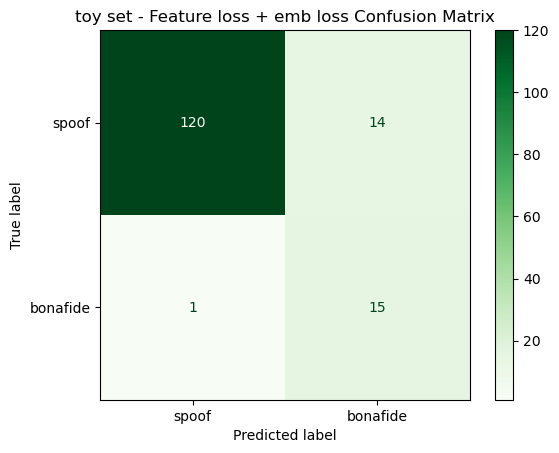

In [9]:
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("toy set - Feature loss + emb loss Confusion Matrix")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [12]:
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)

6.110074626865672 2.0657944679260254


### 1e-05_toy_contraall_epoch_57.txt

In [5]:
pred_df = pd.read_csv("docs/1e-05_toy_contraall_epoch_57.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df.head

<bound method NDFrame.head of               utt     score      pred
0    LA_E_7583177  2.095171  bonafide
1    LA_E_2305822 -1.831135     spoof
2    LA_E_6280972  0.799650  bonafide
3    LA_E_7475469 -0.358052     spoof
4    LA_E_3201553 -1.406074     spoof
..            ...       ...       ...
145  LA_E_9034225 -2.503330     spoof
146  LA_E_2304975  1.075528  bonafide
147  LA_E_9690292 -2.856091     spoof
148  LA_E_1477083 -3.660738     spoof
149  LA_E_9753859 -0.539411     spoof

[150 rows x 3 columns]>

In [6]:
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

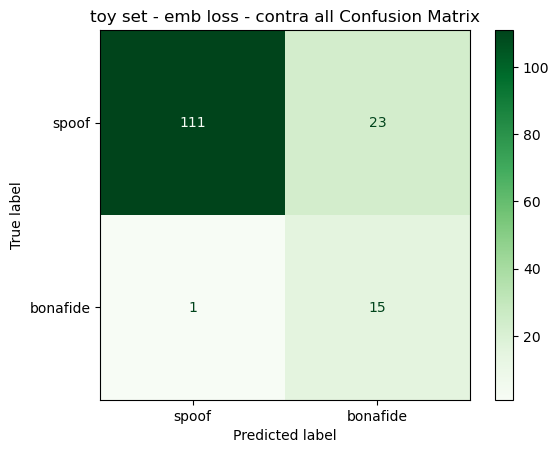

In [7]:
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("toy set - emb loss - contra all Confusion Matrix")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [8]:
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)

6.110074626865672 0.9172852039337158


## ASVspoof2019 eval

In [113]:
# load dev set
eval_df = pd.read_csv("../traindata/asvspoof_2019_supcon/protocol.txt", sep=" ", header=None)
eval_df.columns = ["sid", "utt","phy", "attack", "label"]
eval_df = eval_df[eval_df['utt'].str.contains("LA_E")]
eval_df.head


<bound method NDFrame.head of            sid           utt phy attack     label
23092  LA_0039  LA_E_2834763   -    A11     spoof
23093  LA_0014  LA_E_8877452   -    A14     spoof
23094  LA_0040  LA_E_6828287   -    A16     spoof
23095  LA_0022  LA_E_6977360   -    A09     spoof
23096  LA_0031  LA_E_5932896   -    A13     spoof
...        ...           ...  ..    ...       ...
94324  LA_0004  LA_E_1665632   -      -  bonafide
94325  LA_0038  LA_E_5085671   -    A09     spoof
94326  LA_0012  LA_E_4926022   -    A16     spoof
94327  LA_0052  LA_E_2894498   -      -  bonafide
94328  LA_0009  LA_E_4689563   -    A19     spoof

[71237 rows x 5 columns]>

### 1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_33.txt

EER: 5.0032%, threshold: 4.5948


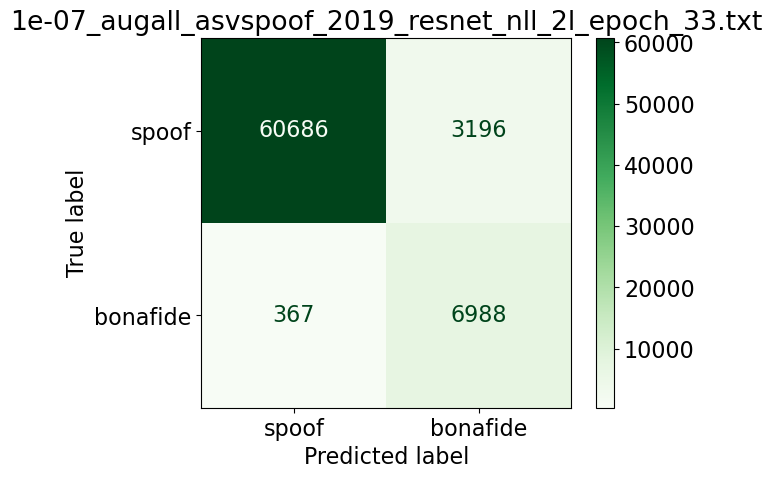

In [114]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_33.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_33.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_46.txt

EER: 2.8837%, threshold: -0.0017


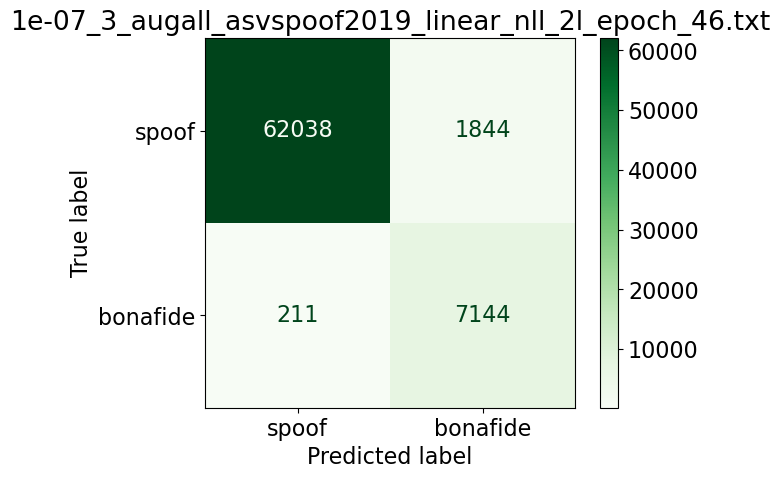

In [115]:
pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


In [86]:
res_df[(res_df['label'] == 'spoof') & (res_df['score'] > -0.1)]['attack'].value_counts()

A10    4102
A16    1212
A12     384
A11      72
A19      72
A14      50
A15      24
A17      22
A07      10
A18       2
A08       2
Name: attack, dtype: int64

-0.0007096394547261 -7.467826843261719


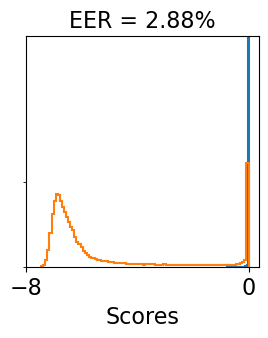

In [126]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=16)
# plt.legend(fontsize=14)
# plt.stick_params(labelsize=16)

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-8,0], fontsize=16)
plt.yticks([])
plt.ylim(0,5)

# plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/1e-07_3_augall_asvspoof2019_resnet_nll_2l_epoch_49.png", dpi=600)
plt.show()
plt.close()


### 1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_29.txt

EER: 1.9434%, threshold: -0.0049


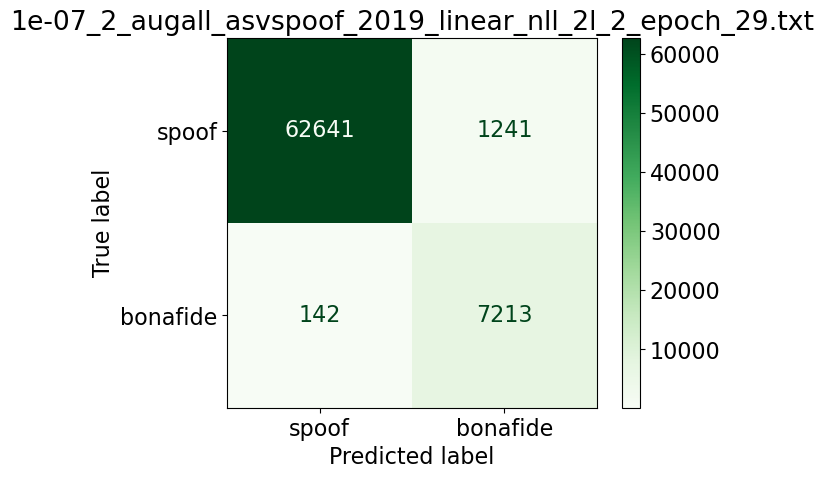

In [45]:
pred_df = pd.read_csv("docs/1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_29.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_29.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()
plt.close()

-0.0020124914590269 -7.416412830352783


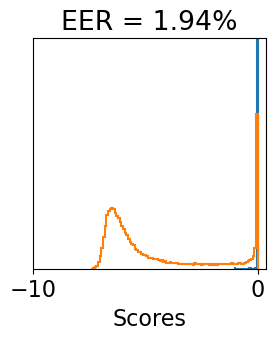

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0])
plt.yticks([])
plt.ylim(0,2)
plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.show()
plt.savefig("figs/1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_29.pdf", dpi=600)


EER: 3.3750%, threshold: -0.0011


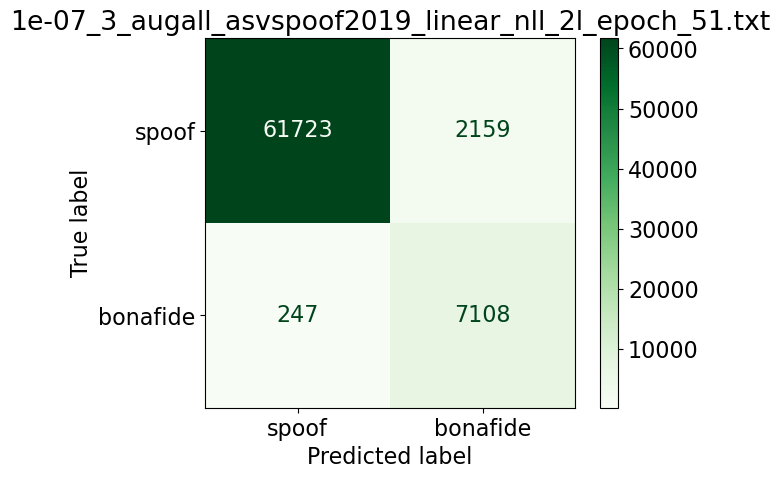

In [134]:
pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_51.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_51.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-0.0009340452379547 -7.457745552062988


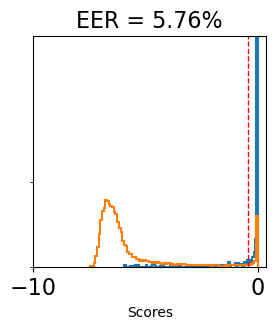

In [62]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=16)

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0], fontsize=16)
plt.yticks([])
plt.ylim(0,5)
plt.savefig("figs/1e-07_3_augall_asvspoof2019_linear_nll_2l_epoch_51.pdf", dpi=600)
# Displaying the plot
plt.show()


### 1e-07_3_augall_asvspoof2019_resnet_nll_2l_epoch_49.txt

In [27]:
pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2019_resnet_nll_2l_epoch_49.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2019_resnet_nll_2l_epoch_49.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


NameError: name 'eval_df' is not defined

In [91]:
res_df[(res_df['label'] == 'spoof') & (res_df['score'] > -0.1)]['attack'].value_counts()

A10    4487
A16    1667
A12     819
A14     385
A19     223
A15     210
A11     151
A07      98
A08      64
A17      24
A18       3
A09       1
Name: attack, dtype: int64

5.04769229888916 -4.882542610168457


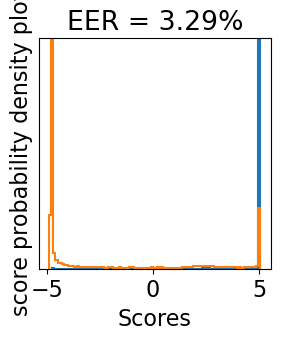

<Figure size 640x480 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,2)
plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.show()
plt.savefig("figs/1e-07_3_augall_asvspoof2019_resnet_nll_2l_epoch_49.pdf", dpi=600)


### 1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_46.txt

EER: 7.7631%, threshold: -0.0013


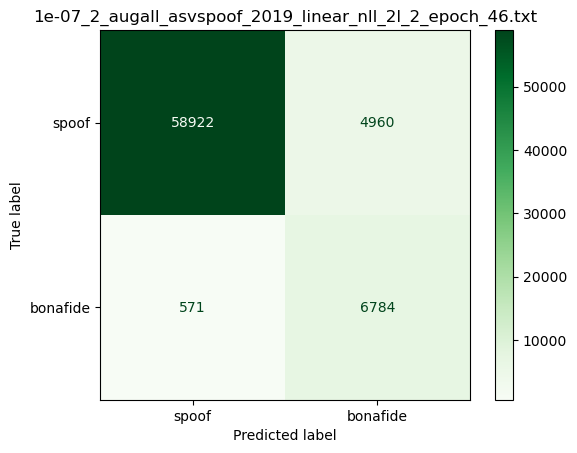

In [3]:
pred_df = pd.read_csv("docs/1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_2_augall_asvspoof_2019_linear_nll_2l_2_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-0.0006325627909973 -8.24477481842041


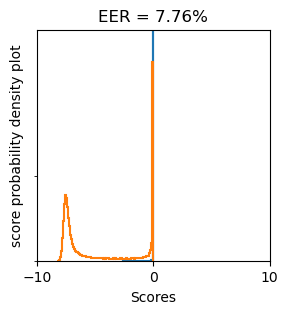

In [4]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### AASIST-SSL reverb

EER: 11.7477%, threshold: -3.4063


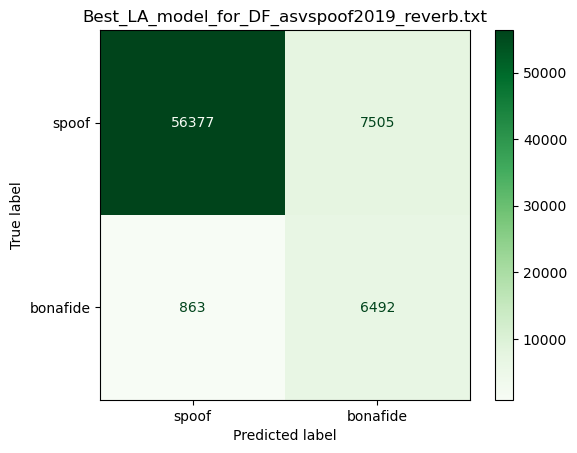

In [26]:
pred_df = pd.read_csv("/dataa/phucdt/SSL_Anti-spoofing/res/Best_LA_model_for_DF_asvspoof2019_reverb.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score"]

# print(pred_df.head)

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("Best_LA_model_for_DF_asvspoof2019_reverb.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


4.7817230224609375 -3.759036302566528


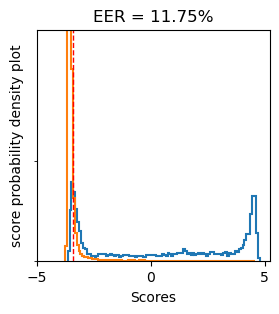

In [29]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,3)
# Displaying the plot
plt.show()


### 1e-07_2_augall_asvspoof_2019_resnet_nll_2l_epoch_30.txt

EER: 2.8544%, threshold: 2.2420


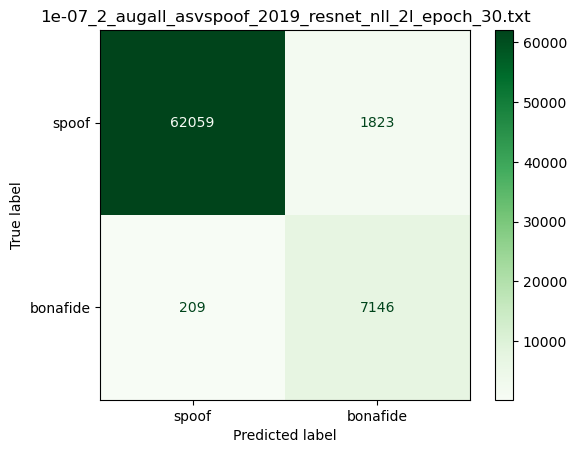

In [18]:
pred_df = pd.read_csv("docs/1e-07_2_augall_asvspoof_2019_resnet_nll_2l_epoch_30.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_2_augall_asvspoof_2019_resnet_nll_2l_epoch_30.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


5.33832597732544 -3.920779705047608


/tmp/ipykernel_727880/3107978059.py:31: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.xticks([-10,0,10])


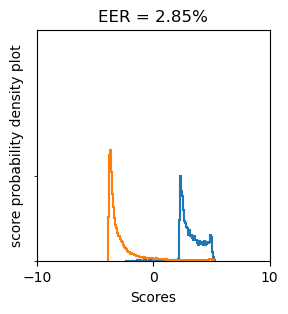

In [19]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt

EER: 1.6044%, threshold: -0.0033


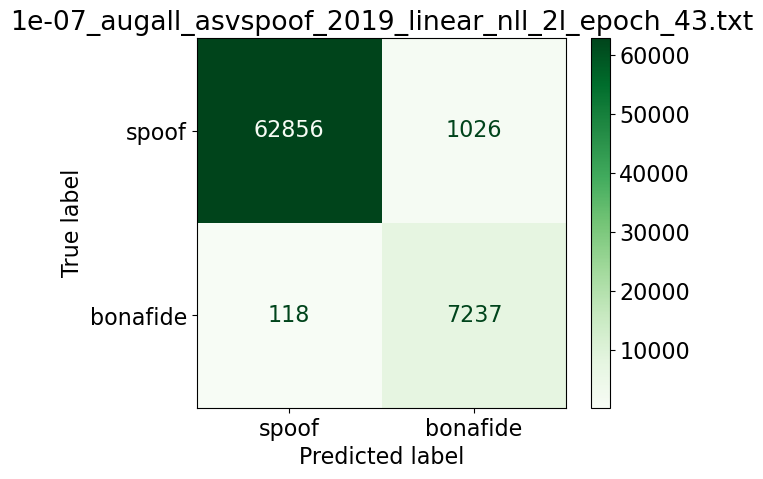

In [29]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-0.0006679449579678 -8.649971008300781


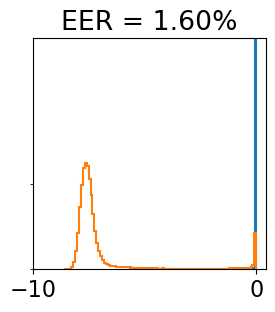

In [31]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0])
plt.yticks([])
plt.ylim(0,5)
plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/augall_linear_2l_epoch_43_la19.pdf", dpi=600)
plt.show()


-0.0006679449579678 -8.649971008300781


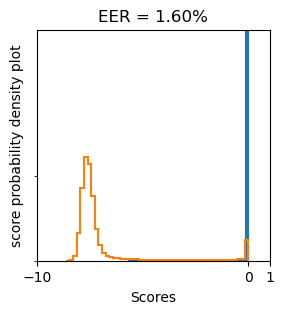

In [17]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=50, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=50, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,1])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_augall_asvspoof_2019_reverb_linear_nll_2l_epoch_43.txt

EER: 25.2343%, threshold: -7.3392


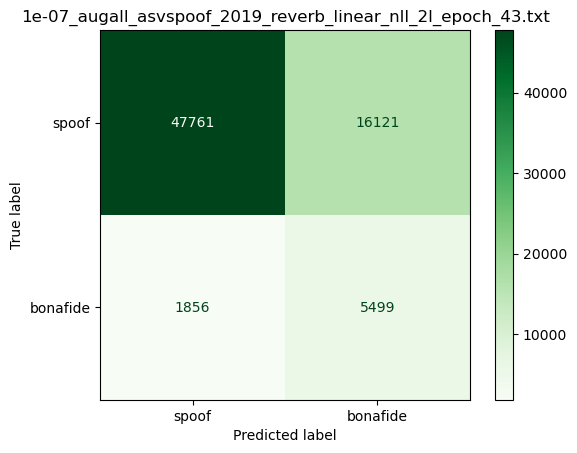

In [66]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_58.txt

EER: 3.0182%, threshold: 4.6609


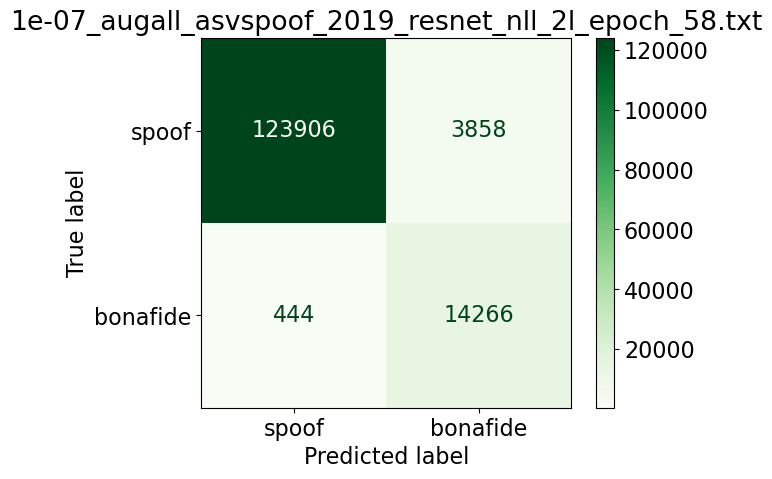

In [32]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


4.945271015167236 -4.87213659286499


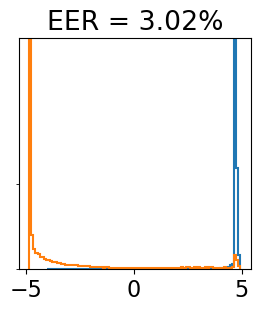

In [34]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/augall_resnet_2l_epoch_58_la19.pdf", dpi=600)
plt.show()


### 1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt

EER: 1.6044%, threshold: -0.0032


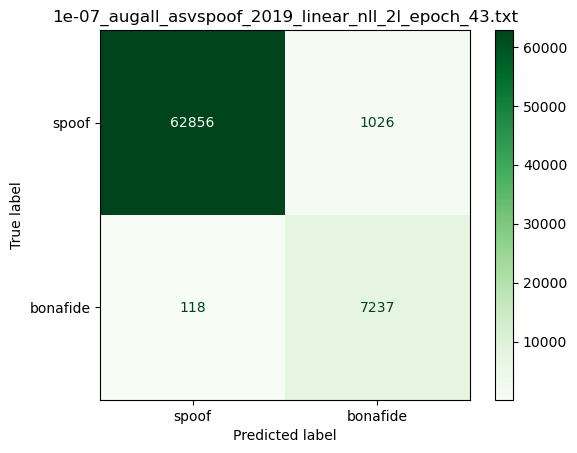

In [62]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-0.0006148116663098 -8.547480583190918


/tmp/ipykernel_3076634/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


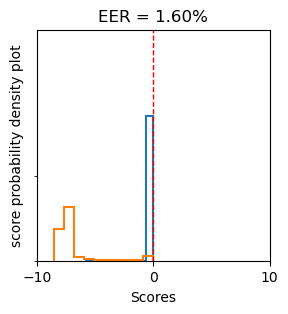

In [63]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_18.txt

EER: 27.8858%, threshold: -2.9590


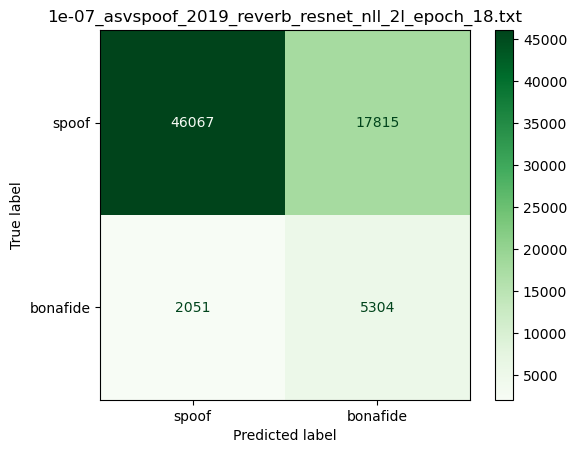

In [32]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_18.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_18.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


3.6426849365234375 -4.298251628875732


/tmp/ipykernel_3076634/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


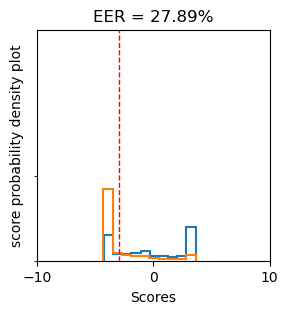

In [33]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_resnet_l2_all_epoch_15.txt

EER: 4.7041%, threshold: 4.0088


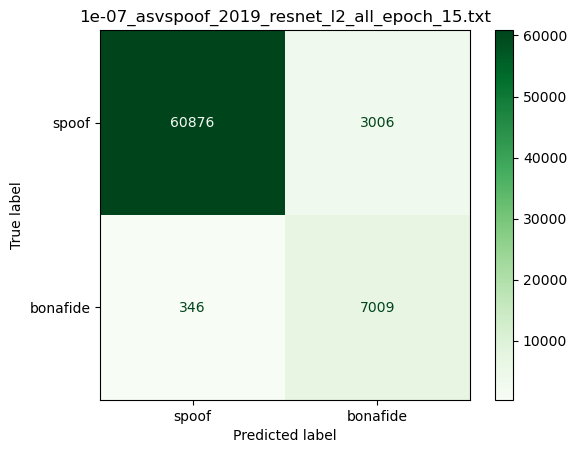

In [31]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_l2_all_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_l2_all_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()
F

### 1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_58.txt

EER: 22.0800%, threshold: -4.7998


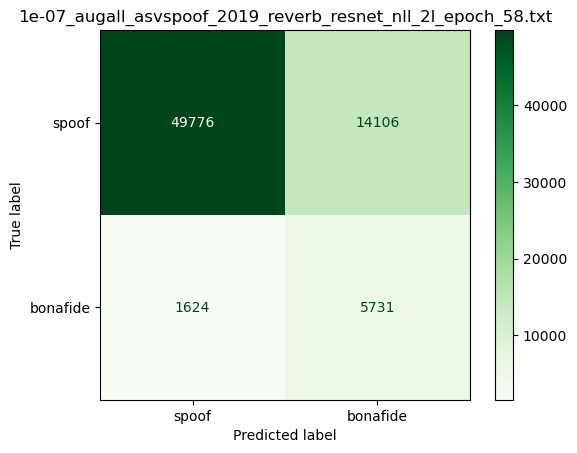

In [24]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


4.940916538238525 -4.8655619621276855


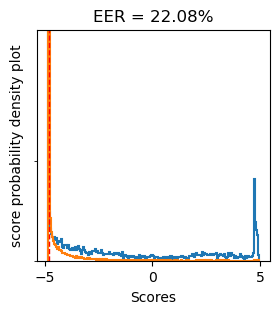

In [25]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=200, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=200, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,3)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_xinwang_reproduce_epoch_58.txt

EER: 3.6701%, threshold: -0.0030


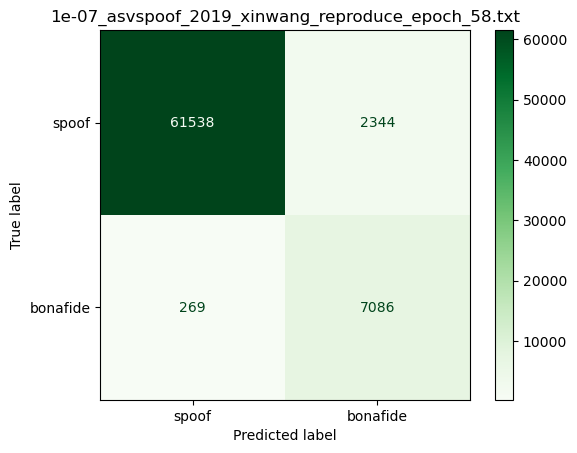

In [46]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_xinwang_reproduce_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_xinwang_reproduce_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-5.435795901576057e-05 -8.74359130859375


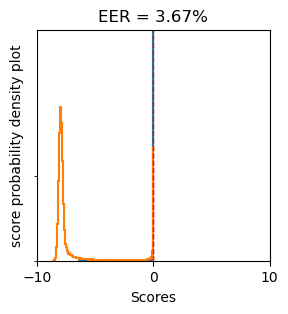

In [38]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=200, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=200, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_xinwang_reproduce_epoch_30.txt

EER: 1.4660%, threshold: -0.0616


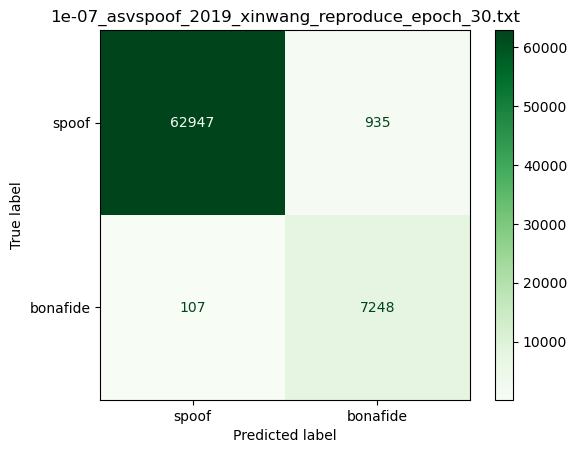

In [41]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_xinwang_reproduce_epoch_30.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_xinwang_reproduce_epoch_30.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-9.381330892210826e-05 -7.518246173858643


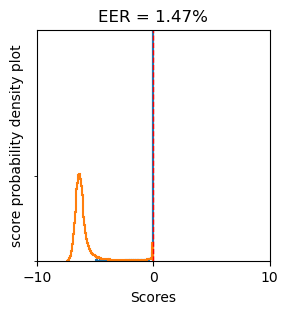

In [42]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_27.txt

EER: 27.4914%, threshold: -3.8411


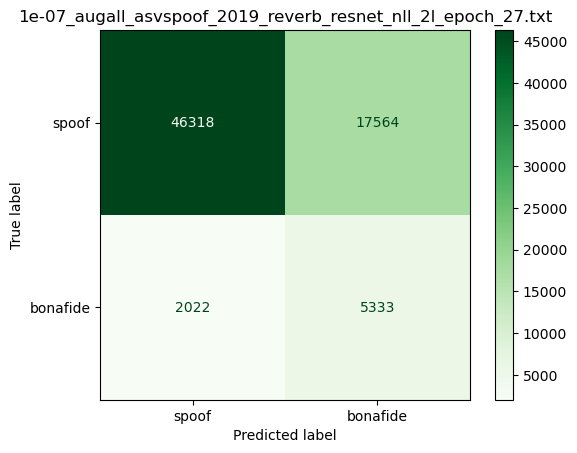

In [19]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_27.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_27.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_42.txt

EER: 24.5408%, threshold: -4.4007


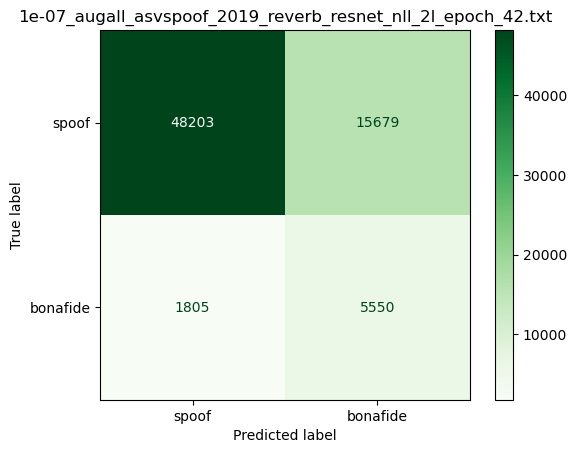

In [18]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_42.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_42.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_56.txt

EER: 29.3142%, threshold: -4.8106


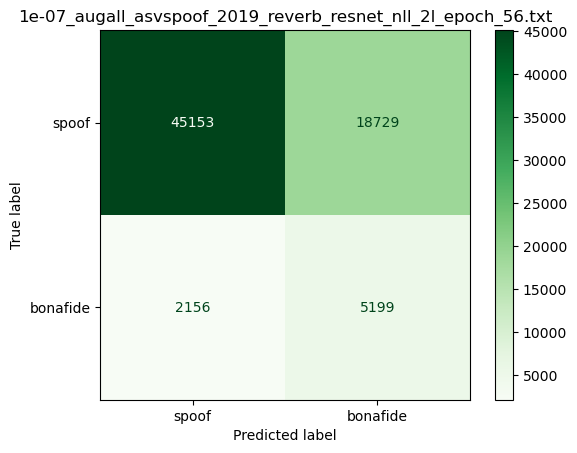

In [45]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_56.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_56.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_71.txt

EER: 32.5476%, threshold: -4.8958


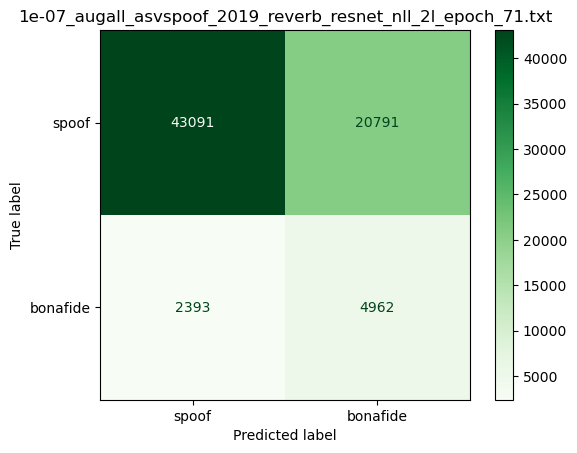

In [14]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_71.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_reverb_resnet_nll_2l_epoch_71.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_71.txt

EER: 5.1361%, threshold: 4.8644


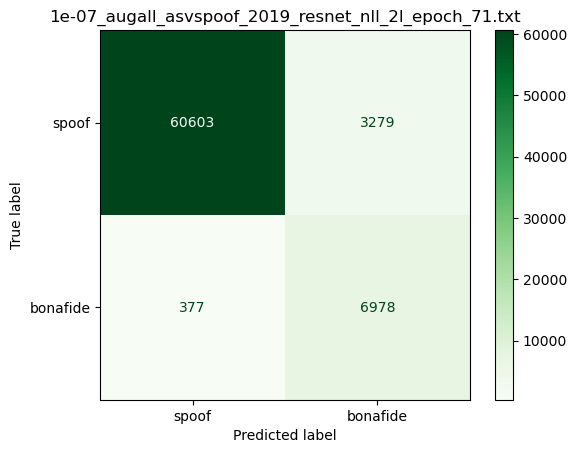

In [10]:
pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_71.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2019_resnet_nll_2l_epoch_71.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_asvspoof_2019_resnet_l1_all_epoch_34.txt

EER: 5.1646%, threshold: 4.4107


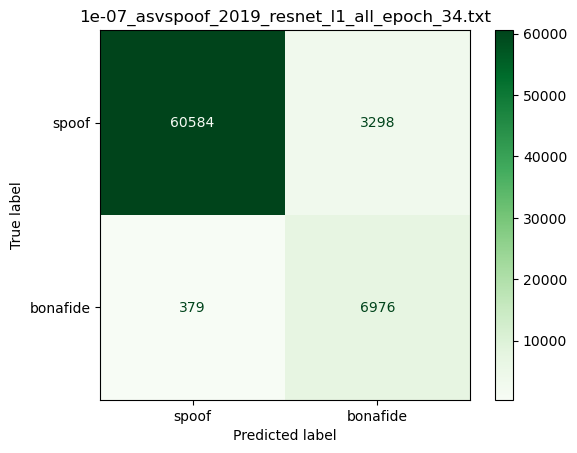

In [24]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_l1_all_epoch_34.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_l1_all_epoch_34.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_aug_asvspoof_2019_linear_nll_2l_online_epoch_46.txt

EER: 4.2828%, threshold: -0.0011


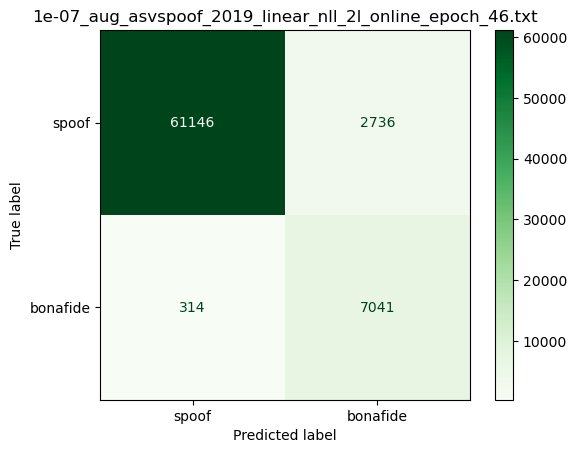

In [22]:
pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2019_linear_nll_2l_online_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2019_linear_nll_2l_online_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


-0.0005200940649956 -9.453369140625


/tmp/ipykernel_1025791/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


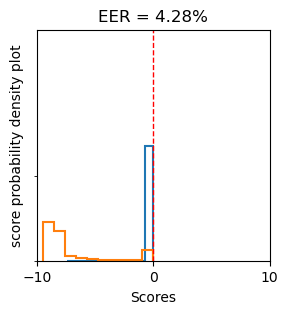

In [23]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_aug_asvspoof_2019_reverb_resnet_nll_online_2_epoch_26.txt

EER: 26.1829%, threshold: -3.7345


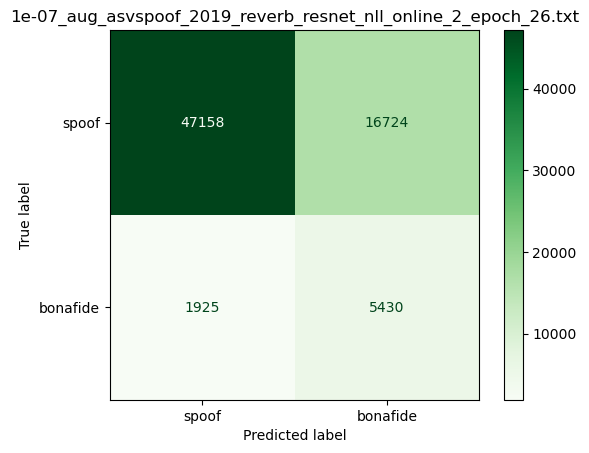

In [5]:
pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2019_reverb_resnet_nll_online_2_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2019_reverb_resnet_nll_online_2_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_aug_asvspoof_2019_resnet_nll_online_2_epoch_26.txt

EER: 2.1480%, threshold: 3.5540


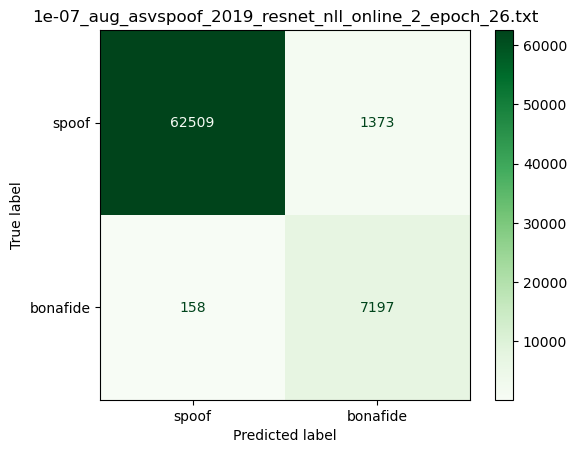

In [3]:
pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2019_resnet_nll_online_2_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2019_resnet_nll_online_2_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


4.068133354187012 -4.459963321685791


/tmp/ipykernel_1025791/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


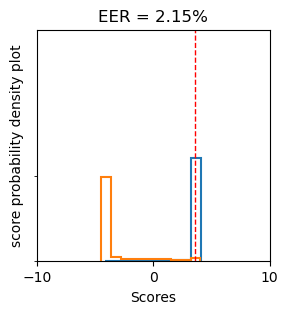

In [4]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_39.txt

EER: 26.9448%, threshold: -5.0596


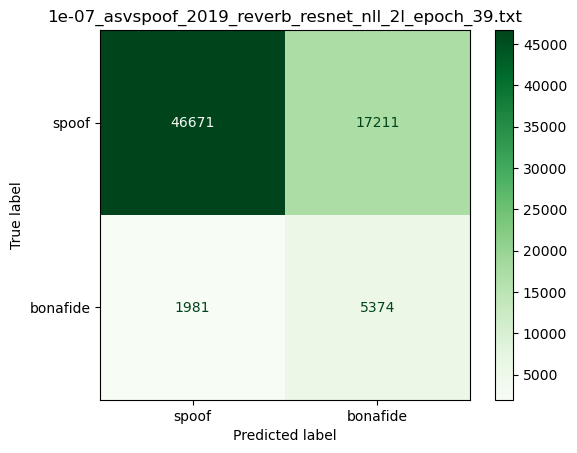

In [18]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_39.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_reverb_resnet_nll_2l_epoch_39.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_asvspoof_2019_resnet_nll_2l_epoch_39.txt

EER: 3.1135%, threshold: 4.5623


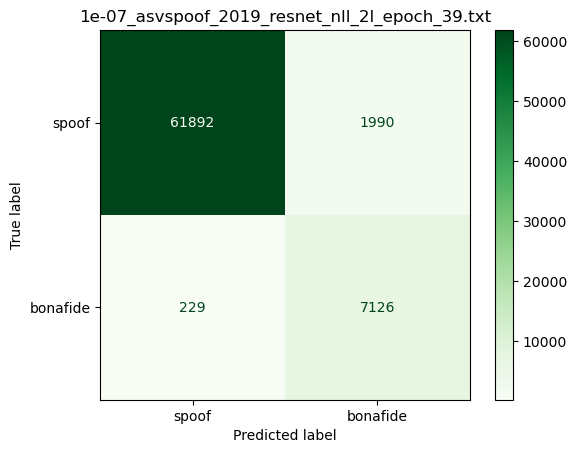

In [3]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_nll_2l_epoch_39.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_nll_2l_epoch_39.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


4.581214904785156 -5.210290908813477


/tmp/ipykernel_29106/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


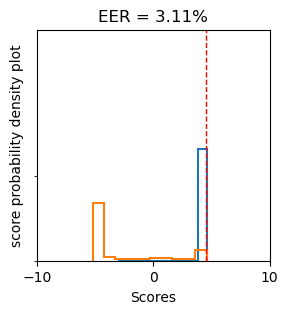

In [8]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_resnet_nll_2l_epoch_1.txt

EER: 27.7466%, threshold: 1.6255


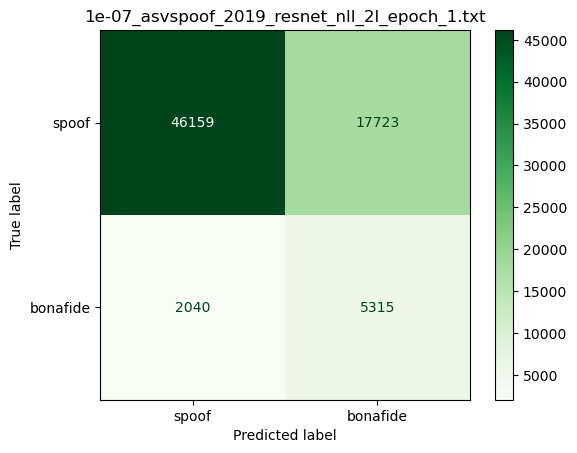

In [9]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_nll_2l_epoch_1.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_nll_2l_epoch_1.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_asvspoof_2019_reverb_resnet_2l_epoch_18.txt

EER: 48.9749%, threshold: 4.0930


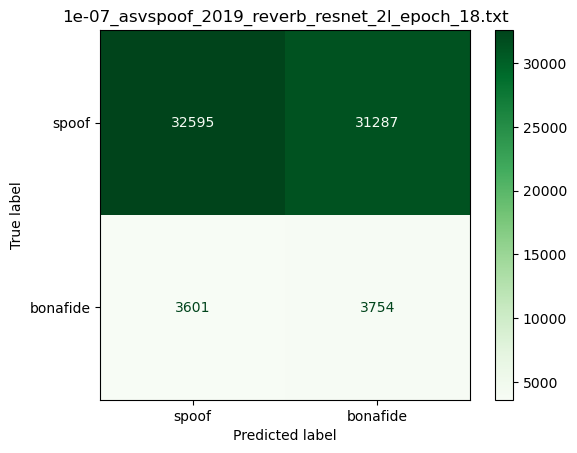

In [4]:
### 1e-07_asvspoof_2019_reverb_resnet_2l_epoch_18.txt
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_reverb_resnet_2l_epoch_18.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_reverb_resnet_2l_epoch_18.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1_1e-07_aug_asvspoof_2019_reverb_resnet_2l_online_epoch_15.txt

EER: 25.9969%, threshold: 3.7577


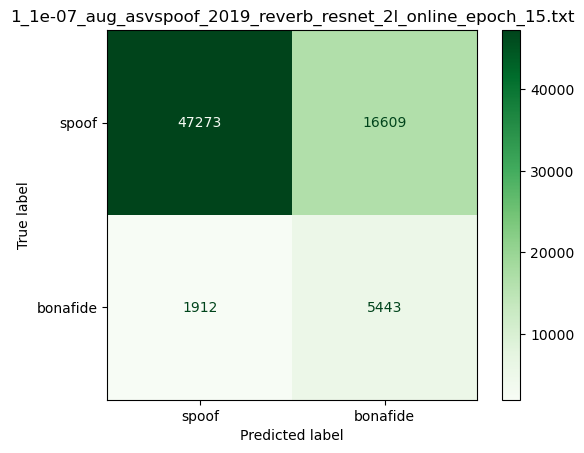

In [7]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2019_reverb_resnet_2l_online_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2019_reverb_resnet_2l_online_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


3.79976749420166 -4.155666828155518


/tmp/ipykernel_1025791/1017808833.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


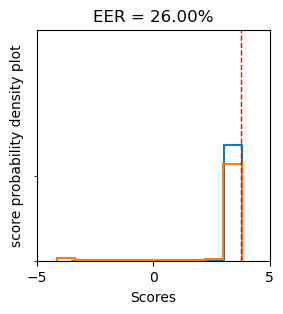

In [10]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1_1e-07_aug_asvspoof_2019_reverb_linear_2l_online_epoch_13.txt

EER: 37.1588%, threshold: 2.8692


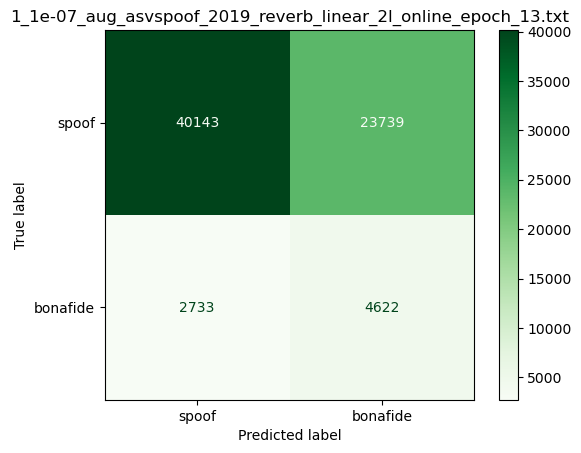

In [10]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2019_reverb_linear_2l_online_epoch_13.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2019_reverb_linear_2l_online_epoch_13.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


3.1182992458343506 -2.2875759601593018


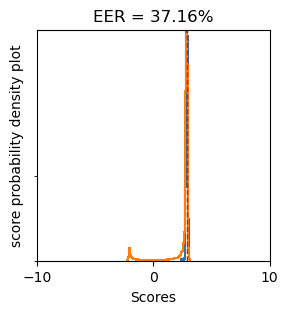

In [11]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### docs/1_1e-07_aug_asvspoof_2019_resnet_2l_epoch_18.txt

EER: 8.2552%, threshold: 4.0811


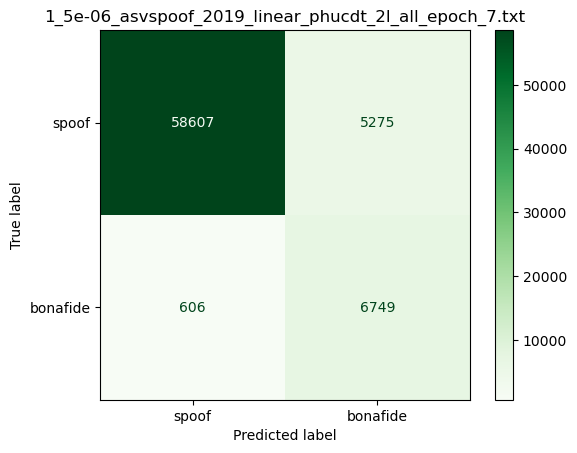

In [3]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2019_resnet_2l_epoch_18.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_5e-06_asvspoof_2019_linear_phucdt_2l_all_epoch_7.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1_1e-07_aug_asvspoof_2019_resnet_2l_online_epoch_15.txt

EER: 3.5756%, threshold: 3.6627


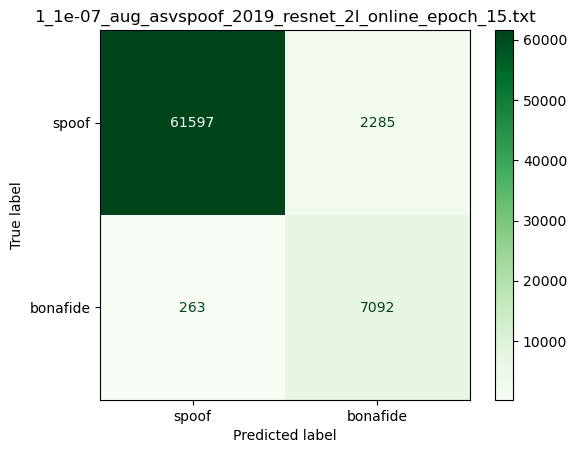

In [9]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2019_resnet_2l_online_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2019_resnet_2l_online_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


3.786819696426392 -4.221022129058838


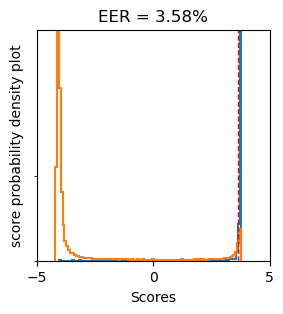

In [10]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100.0))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1_1e-07_aug_asvspoof_2019_linear_2l_epoch_12.txt

EER: 6.5776%, threshold: 2.4622


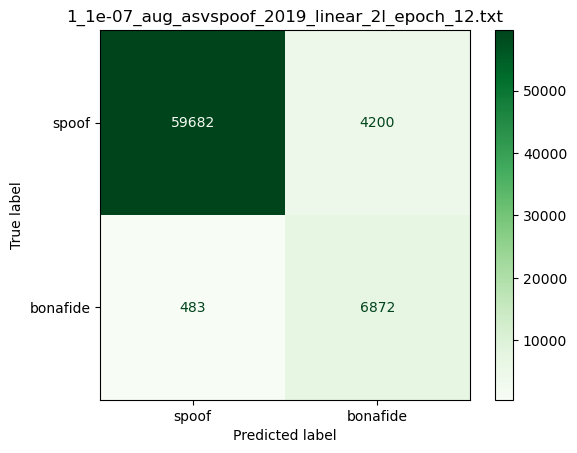

In [6]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2019_linear_2l_epoch_12.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2019_linear_2l_epoch_12.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-07_aug_asvspoof_2019_linear_2l_online_epoch_13.txt

EER: 4.4343%, threshold: 2.7803


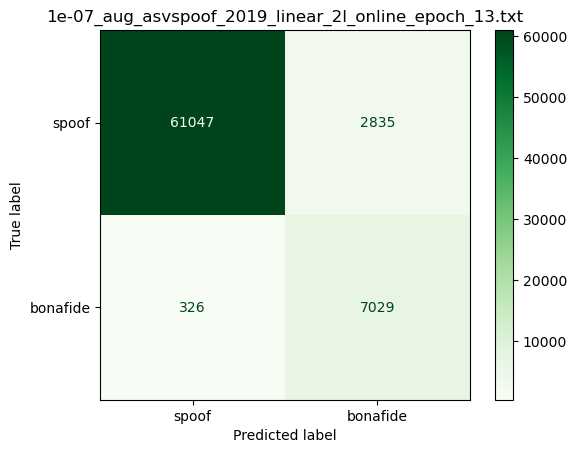

In [7]:
pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2019_linear_2l_online_epoch_13.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2019_linear_2l_online_epoch_13.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1_5e-06_asvspoof_2019_linear_phucdt_2l_all_epoch_7.txt

EER: 15.6523%, threshold: 1.4833


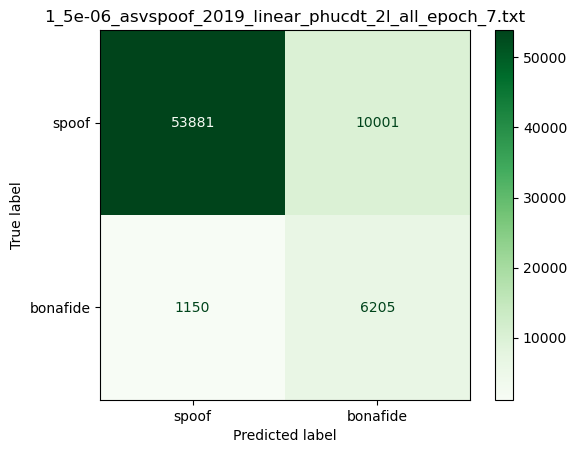

In [3]:
pred_df = pd.read_csv("docs/1_5e-06_asvspoof_2019_linear_phucdt_2l_all_epoch_7.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_5e-06_asvspoof_2019_linear_phucdt_2l_all_epoch_7.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1_5e-06_asvspoof_2019_linear_phucdt_l1_epoch_59.txt

EER: 33.0112%, threshold: 2.2361


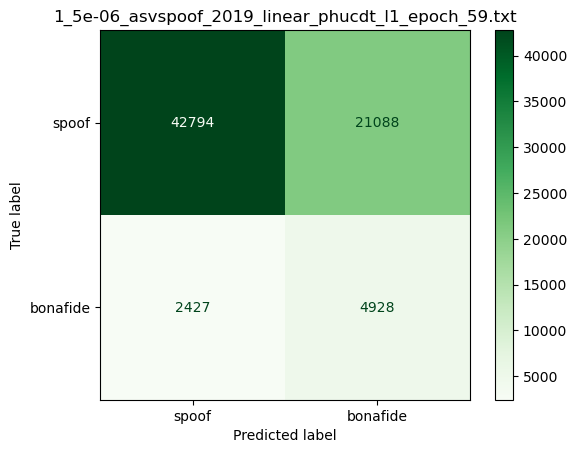

In [15]:
pred_df = pd.read_csv("docs/1_5e-06_asvspoof_2019_linear_phucdt_l1_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_5e-06_asvspoof_2019_linear_phucdt_l1_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### Xinwang exp

EER: 2.9244%, threshold: 5.6351


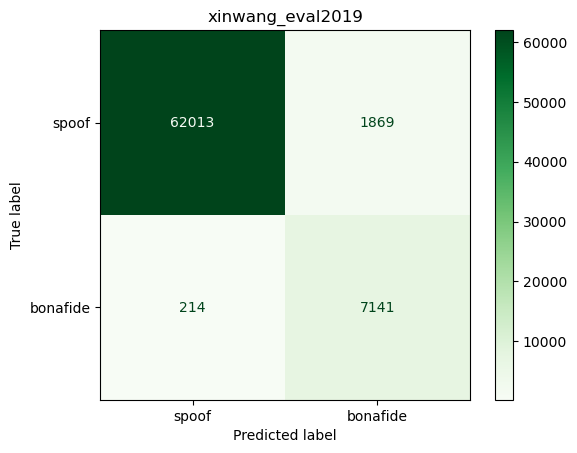

In [11]:

pred_df = pd.read_csv("../xinwang_vocoders/project-NN-Pytorch-scripts/project/09-asvspoof-vocoded-trn/model-ID-7/config_train_toyset_ID_7/01/log_eval_trained_toy_eval_set_score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("xinwang_eval2019")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

7.494542 -9.665274


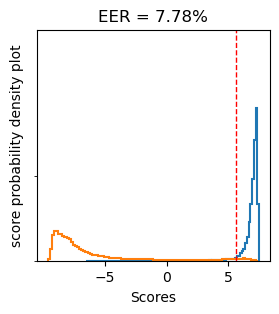

In [14]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = 7.78%')

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


EER: 1.8896%, threshold: 4.5967


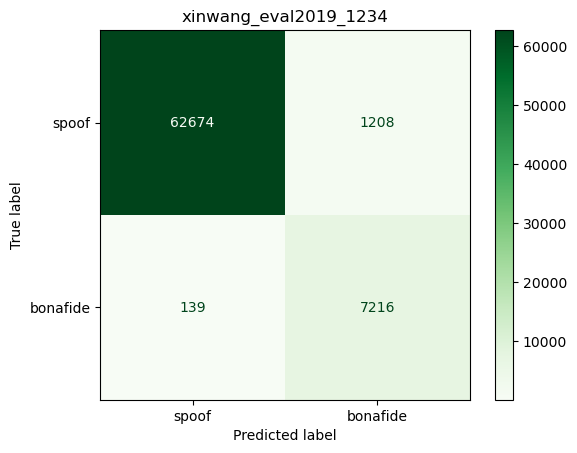

In [29]:

pred_df = pd.read_csv("../xinwang_vocoders/project-NN-Pytorch-scripts/project/09-asvspoof-vocoded-trn/model-ID-7/config_train_toyset_ID_7/1234/log_eval_trained_asvspoof2019_eval_score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("xinwang_eval2019_1234")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

7.119621 -8.85538


/tmp/ipykernel_1331806/2682280539.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


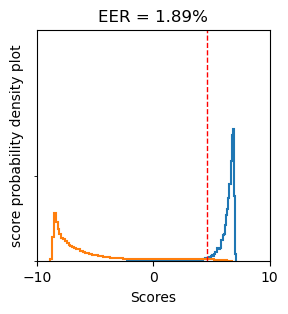

In [30]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


EER: 25.7909%, threshold: -6.7688


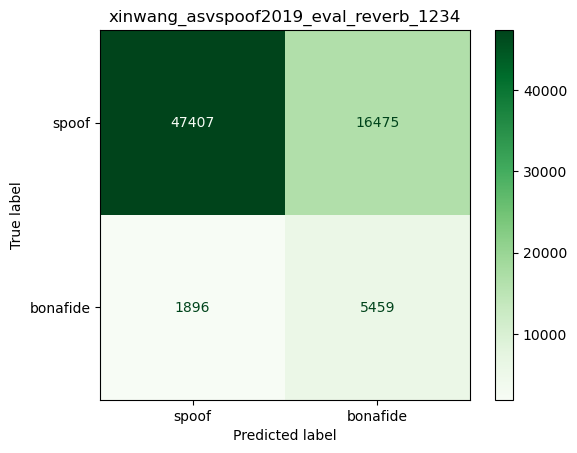

In [6]:

pred_df = pd.read_csv("../xinwang_vocoders/project-NN-Pytorch-scripts/project/09-asvspoof-vocoded-trn/model-ID-7/config_train_toyset_ID_7/1234/log_eval_trained_asvspoof2019_eval_reverb_score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("xinwang_asvspoof2019_eval_reverb_1234")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

6.119349 -8.653692


/tmp/ipykernel_4047849/2682280539.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


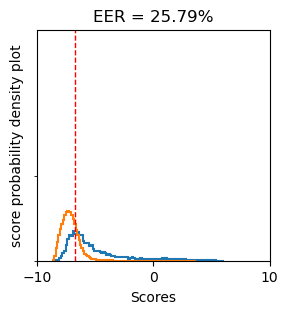

In [7]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2019_resnet_2l_all_epoch_21.txt

EER: 1.7405%, threshold: 4.1829


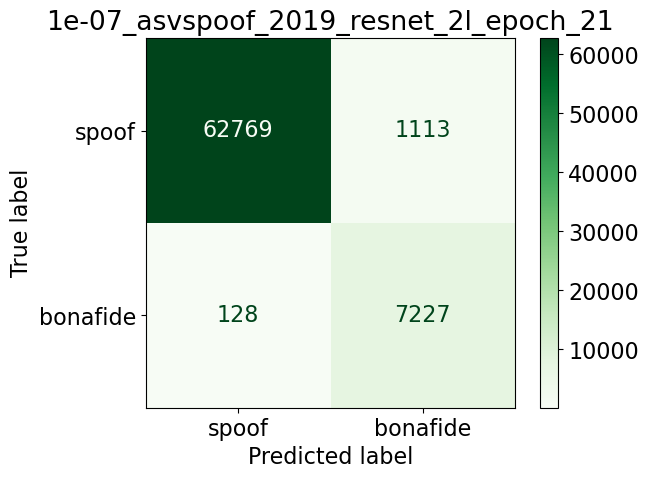

In [127]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_2l_all_epoch_21.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# filter TTS res_df which has attack from A07 to A16
# res_df = res_df[res_df['attack'].str.contains('A0[7-9]') | res_df['attack'].str.contains('A1[0-6]') | res_df['attack'].str.contains('-')]

# filter VC res_df which has attack from A17 to A19
# res_df = res_df[res_df['attack'].str.contains('A1[7-9]') | res_df['attack'].str.contains('-')]

# filter Neural vocoder res_df which has attack A08, A10, A12, A15
# res_df = res_df[res_df['attack'].str.contains('A0[8,10,12,15]') | res_df['attack'].str.contains('-')]

# filter DSP vocoder res_df which has attack A09, A11, A13, A14, A16, A17, A18, A19
# res_df = res_df[res_df['attack'].str.contains('A0[9,11,13,14,16]') | res_df['attack'].str.contains('A1[7-9]') | res_df['attack'].str.contains('-')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_2l_epoch_21")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [128]:
res_df[(res_df['label'] == 'spoof') & (res_df['score'] > 0)]['attack'].value_counts()

A10    3943
A16    1187
A12     778
A19     669
A14     594
A15     535
A11     429
A08     334
A17     129
A07      87
A18      58
A09       5
Name: attack, dtype: int64

4.440906524658203 -4.4779462814331055


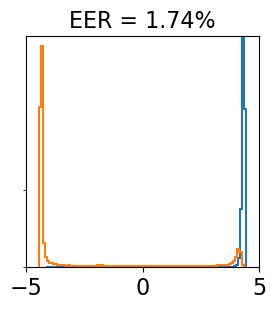

In [131]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=16)


# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5], fontsize=16)
plt.yticks([])
plt.ylim(0,7)
# Displaying the plot
plt.rcParams.update({'font.size': 16})
plt.savefig("figs/resnet_2l_epoch_21_la19.pdf", dpi=600)
plt.show()
plt.close()


### 1e-07_asvspoof_2019_resnet_2l_one_epoch_25.txt

EER: 5.6313%, threshold: 4.5246


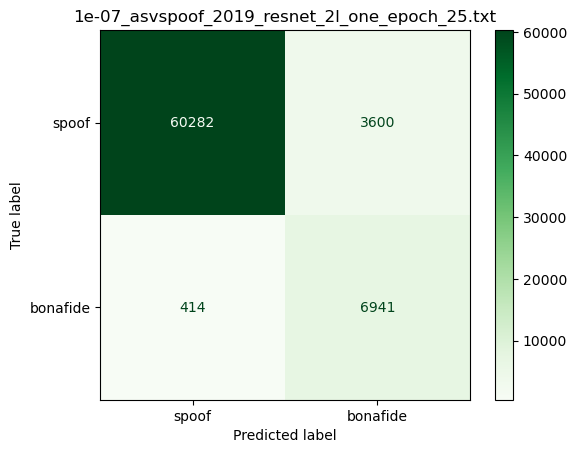

In [17]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2019_resnet_2l_one_epoch_25.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2019_resnet_2l_one_epoch_25.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_asvspoof_2019_linear_l2_one_epoch_28.txt

EER: 4.3912%, threshold: 3.6002


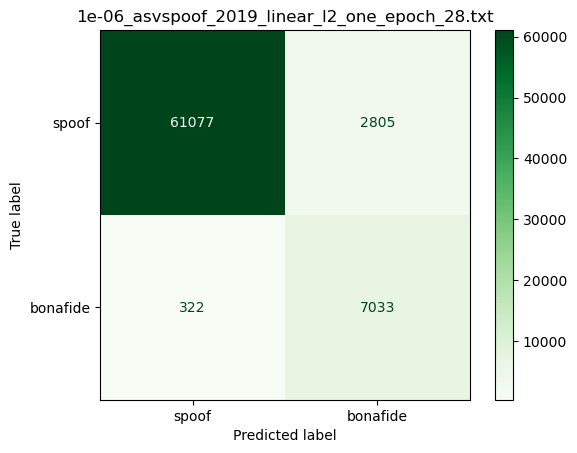

In [3]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_l2_one_epoch_28.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_l2_one_epoch_28.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_asvspoof_2021_linear_2l_one_epoch_59.txt

EER: 6.1832%, threshold: 4.1525


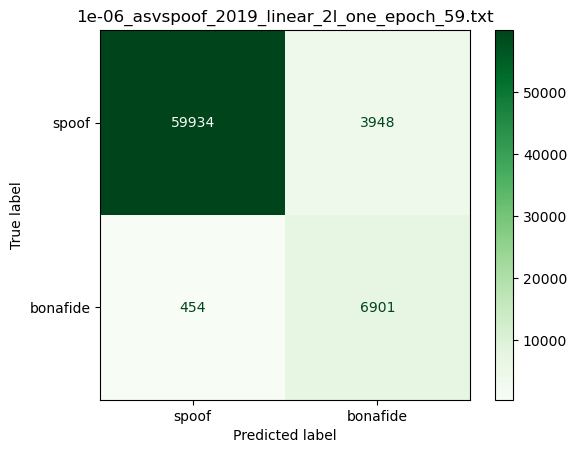

In [7]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_2l_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_2l_one_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_asvspoof_2019_linear_l1_one_epoch_48.txt

EER: 3.5609%, threshold: 4.4038


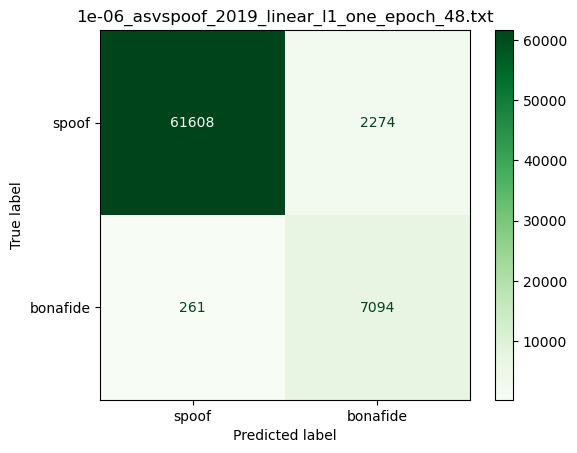

In [8]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_l1_one_epoch_48.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_l1_one_epoch_48.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_asvspoof_2019_linear_l2_all_epoch_40.txt

EER: 7.0835%, threshold: 3.8083


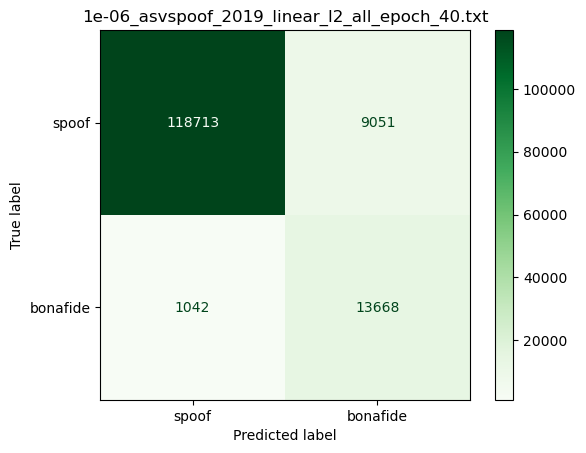

In [15]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_l2_all_epoch_40.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_l2_all_epoch_40.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_asvspoof_2019_linear_l1_all_epoch_63.txt

EER: 7.4102%, threshold: 3.6426


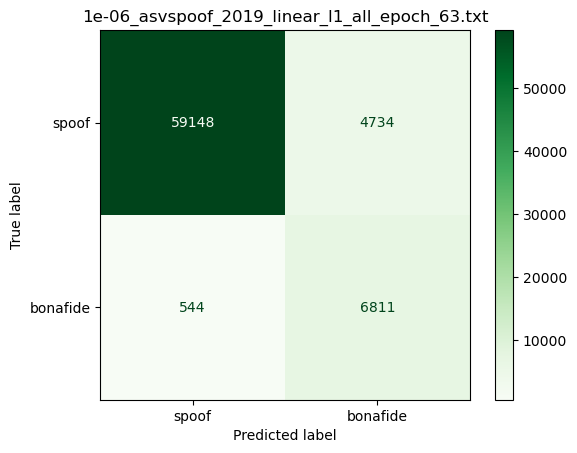

In [6]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_l1_all_epoch_63.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_l1_all_epoch_63.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 0.0001_asvspoof_2019_loss_emb_only_epoch_9


In [7]:
pred_df = pd.read_csv("docs/0.0001_asvspoof_2019_loss_emb_only_epoch_9.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head

<bound method NDFrame.head of                  utt     score      pred
0       LA_E_1000147  4.368676  bonafide
1       LA_E_1000273  4.365367  bonafide
2       LA_E_1000791 -4.440244     spoof
3       LA_E_1000841 -4.458634     spoof
4       LA_E_1000989 -4.381494     spoof
...              ...       ...       ...
71928  LA_E_A9965149  4.365993  bonafide
71929  LA_E_A9967055  4.365146  bonafide
71930  LA_E_A9970430  4.365044  bonafide
71931  LA_E_A9975938  0.064091  bonafide
71932  LA_E_A9997819  4.365258  bonafide

[71933 rows x 3 columns]>

In [8]:
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

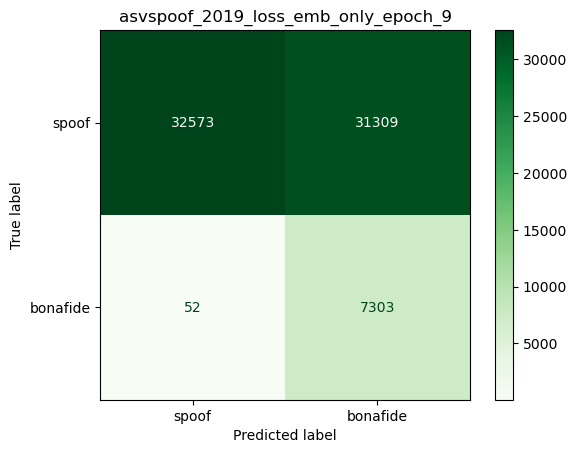

In [9]:
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("asvspoof_2019_loss_emb_only_epoch_9")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [10]:
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)

37.81224074954138 4.36518669128418


### docs/0.0001_asvspoof_2019_contraall_2l_epoch_27.txt

12.221191046689137 4.916728019714356


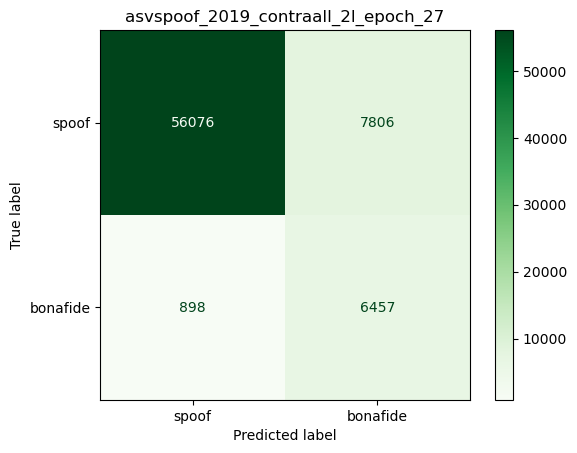

In [8]:
pred_df = pd.read_csv("docs/0.0001_asvspoof_2019_contraall_2l_epoch_27.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)
# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("asvspoof_2019_contraall_2l_epoch_27")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### docs/0.0001_asvspoof_2019_2l_one_epoch_26.txt

EER: 25.9147%, threshold: 5.3489


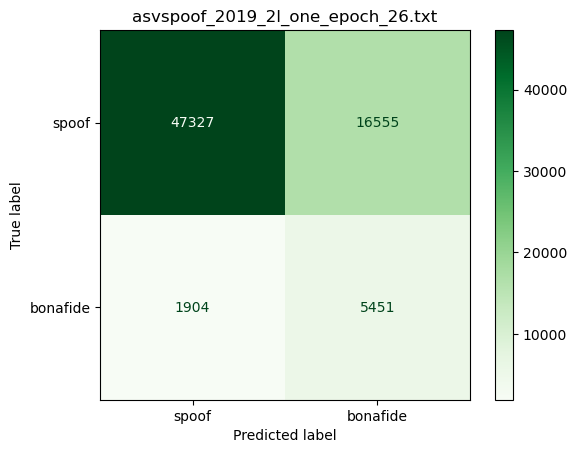

In [9]:
pred_df = pd.read_csv("docs/0.0001_asvspoof_2019_2l_one_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("asvspoof_2019_2l_one_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### docs/1e-06_asvspoof_2019_linear_loss_hiddenstate_only_one_epoch_31.txt

EER: 8.6310%, threshold: 3.5700


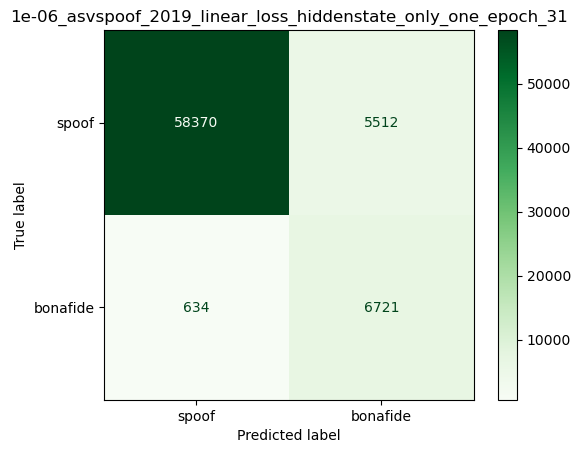

In [16]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_loss_hiddenstate_only_one_epoch_31.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_loss_hiddenstate_only_one_epoch_31")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


### 1e-06_asvspoof_2019_linear_loss_emb_only_one_epoch_59

EER: 3.9843%, threshold: 4.6792


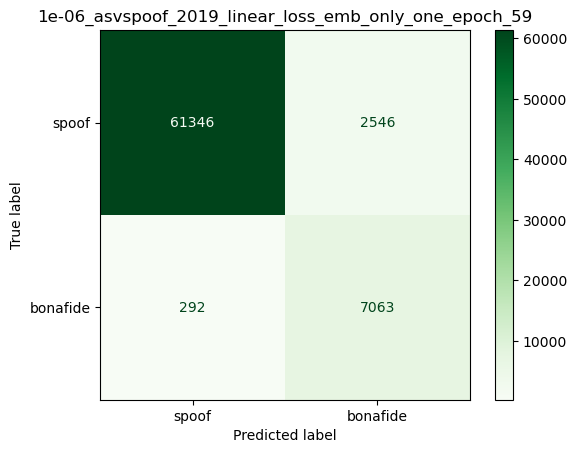

In [8]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_loss_emb_only_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_loss_emb_only_one_epoch_59")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### docs/1e-06_asvspoof_2019_linear_2l_all_epoch_58.txt

EER: 6.8252%, threshold: 3.5060


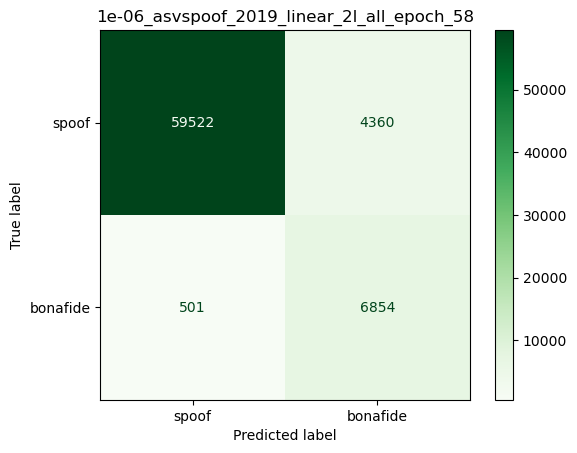

In [6]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_2l_all_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_2l_all_epoch_58")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

## ASVspoof 2021 DF

In [2]:
# load DF 2021 set
DF_df = pd.read_csv("/datab/Dataset/ASVspoof/LA/ASVspoof2021_keys/DF/CM/trial_metadata.txt", sep=" ", header=None)
DF_df.columns = ["sid", "utt","codec", "src", "attack", "label", "trim", "subset","vocoder","b","c","d","e"]

DF_df.head


<bound method NDFrame.head of             sid           utt     codec       src        attack  label  \
0       LA_0023  DF_E_2000011   nocodec  asvspoof           A14  spoof   
1          TEF2  DF_E_2000013   low_m4a   vcc2020  Task1-team20  spoof   
2          TGF1  DF_E_2000024    mp3m4a   vcc2020  Task2-team12  spoof   
3       LA_0043  DF_E_2000026    mp3m4a  asvspoof           A09  spoof   
4       LA_0021  DF_E_2000027    mp3m4a  asvspoof           A12  spoof   
...         ...           ...       ...       ...           ...    ...   
611824  VCC2TM2  DF_E_4999945    oggm4a   vcc2018       SPO-N16  spoof   
611825  LA_0044  DF_E_4999962    oggm4a  asvspoof           A19  spoof   
611826  LA_0042  DF_E_4999964  high_ogg  asvspoof           A13  spoof   
611827     TEM1  DF_E_4999980   low_m4a   vcc2020  Task1-team07  spoof   
611828     TGF1  DF_E_4999993    mp3m4a   vcc2020  Task2-team33  spoof   

          trim    subset                           vocoder      b       c   d  \


In [104]:
DF_df['vocoder'].value_counts()

traditional_vocoder                 275553
neural_vocoder_autoregressive       152379
neural_vocoder_nonautoregressive    120915
unknown                              29043
bonafide                             22617
waveform_concatenation               11322
Name: vocoder, dtype: int64

### 1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout_2.txt

EER: 2.1857%, threshold: -2.6224


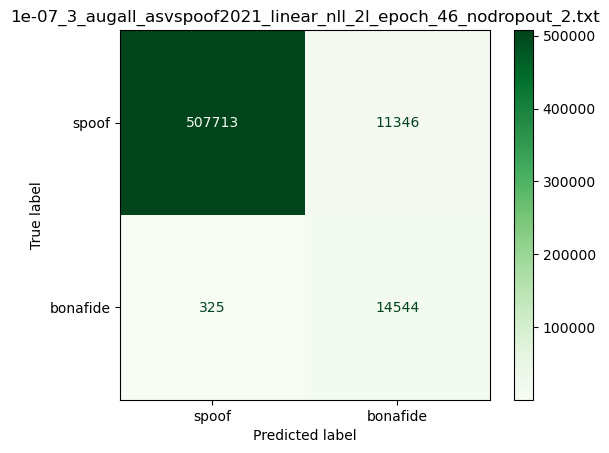

In [4]:

pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout_2.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# filter res_df which has vocoder neural_vocoder_autoregressive
# res_df = res_df[(res_df['vocoder'] == 'neural_vocoder_autoregressive') | (res_df['vocoder'] == 'bonafide')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout_2.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout.txt

EER: 2.1857%, threshold: -2.6224


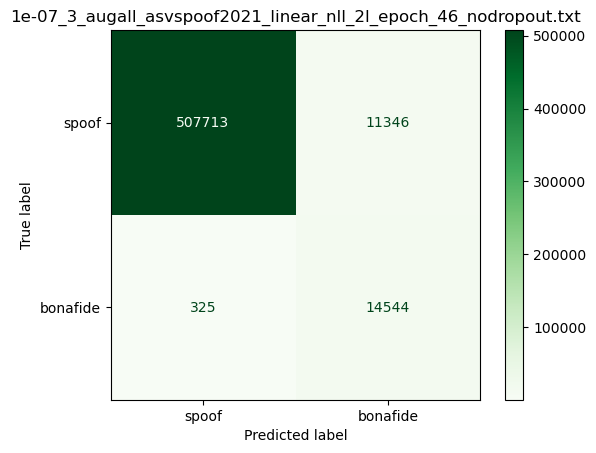

In [5]:

pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# filter res_df which has vocoder neural_vocoder_autoregressive
# res_df = res_df[(res_df['vocoder'] == 'neural_vocoder_autoregressive') | (res_df['vocoder'] == 'bonafide')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46_nodropout.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### AASIST-DF-Best

EER: 2.8464%, threshold: -3.5327


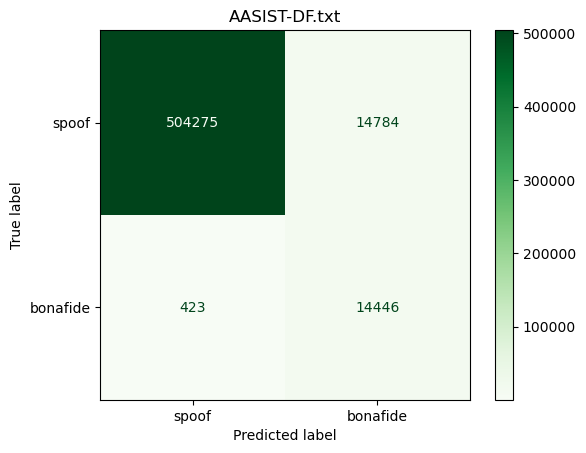

In [56]:

pred_df = pd.read_csv("/dataa/phucdt/SSL_Anti-spoofing/res/eval_CM_scores_file_SSL_DF_best.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# filter res_df which has vocoder neural_vocoder_autoregressive
# res_df = res_df[(res_df['vocoder'] == 'neural_vocoder_autoregressive') | (res_df['vocoder'] == 'bonafide')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("AASIST-DF.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.811042308807373 -3.820472955703736


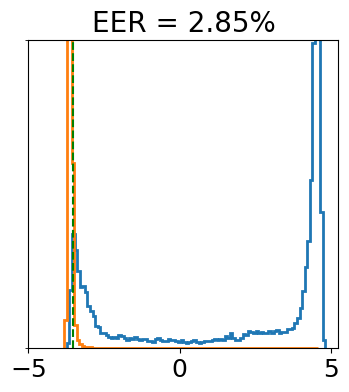

In [57]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/aasist-df.pdf", dpi=600)
# Displaying the plot
plt.show()


In [156]:
res_df[res_df['label'] != res_df['pred']]['vocoder'].value_counts()

neural_vocoder_autoregressive       9582
traditional_vocoder                 3782
neural_vocoder_nonautoregressive     747
unknown                              508
bonafide                             423
waveform_concatenation               165
Name: vocoder, dtype: int64

### 1e-07_3_augall_asvspoof2021_linear_nll_2l_verify_epoch_42.txt

EER: 2.2261%, threshold: -4.0527


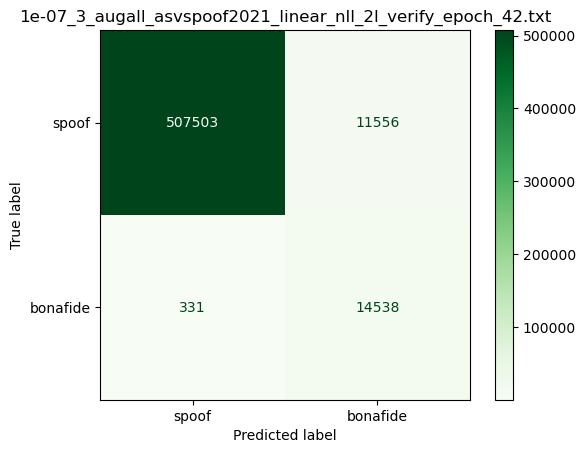

In [16]:

pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2021_linear_nll_2l_verify_epoch_42.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# filter res_df which has vocoder neural_vocoder_autoregressive
# res_df = res_df[(res_df['vocoder'] == 'neural_vocoder_autoregressive') | (res_df['vocoder'] == 'bonafide')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2021_linear_nll_2l_verify_epoch_42.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-0.0007360848248936 -7.539567470550537


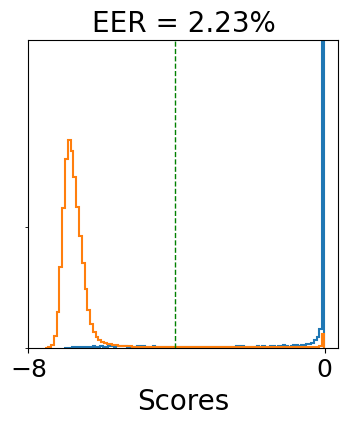

In [18]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-8,0], fontsize=18)
plt.yticks([])
plt.ylim(0,4)
# save fig
# plt.savefig("figs/aasist_df.pdf", dpi=600)
# Displaying the plot
plt.show()


### 1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46.txt

EER: 2.1730%, threshold: -2.4381


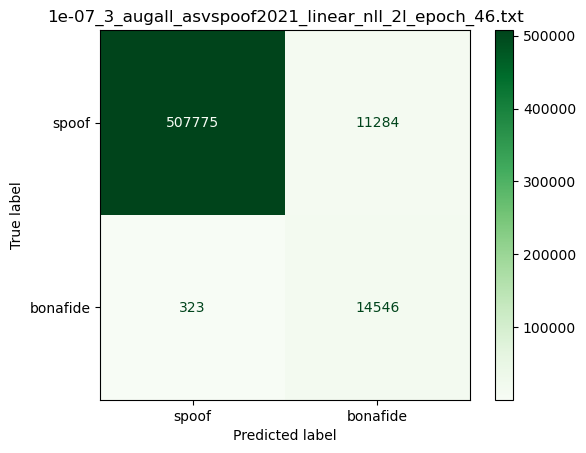

In [63]:

pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# filter res_df which has vocoder neural_vocoder_autoregressive
# res_df = res_df[(res_df['vocoder'] == 'neural_vocoder_autoregressive') | (res_df['vocoder'] == 'bonafide')]

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2021_linear_nll_2l_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-0.0007758706342428 -7.685970783233643


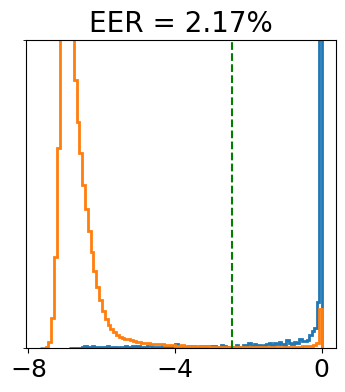

In [64]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-8,-4,0], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/conf-3-linear-df-eval.pdf", dpi=600)
# Displaying the plot
plt.show()


In [159]:
res_df[res_df['label'] != res_df['pred']]['vocoder'].value_counts()

neural_vocoder_autoregressive       8417
waveform_concatenation              1263
traditional_vocoder                 1147
bonafide                             323
neural_vocoder_nonautoregressive     238
unknown                              219
Name: vocoder, dtype: int64

-0.0009340452379547 -7.457745552062988


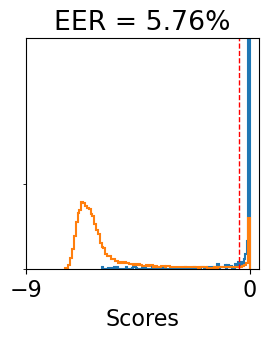

In [111]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-9,0])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_3_augall_asvspoof2021_resnet_nll_2l_epoch_49.txt

EER: 3.2622%, threshold: -4.1554


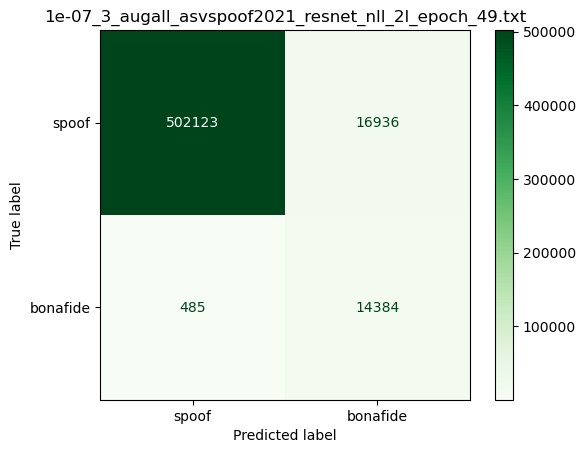

In [53]:

pred_df = pd.read_csv("docs/1e-07_3_augall_asvspoof2021_resnet_nll_2l_epoch_49.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_asvspoof2021_resnet_nll_2l_epoch_49.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

5.048826217651367 -4.879685401916504


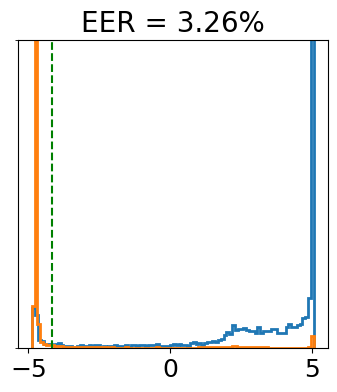

In [54]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/conf-3-resnet.pdf", dpi=600)
# Displaying the plot
plt.show()


5.048826217651367 -4.879685401916504


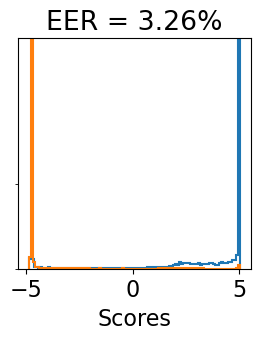

In [75]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_2_augall_asvspoof_2021_linear_nll_2l_epoch_51.txt

EER: 2.6714%, threshold: -6.5338


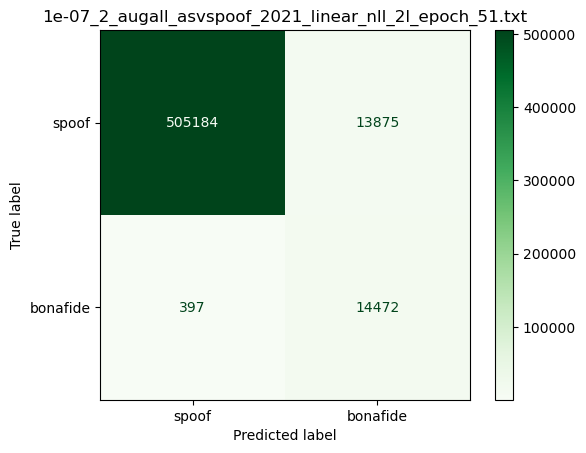

In [21]:

pred_df = pd.read_csv("docs/1e-07_2_augall_asvspoof_2021_linear_nll_2l_epoch_51.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_2_augall_asvspoof_2021_linear_nll_2l_epoch_51.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-8.11782301752828e-05 -7.855926036834717


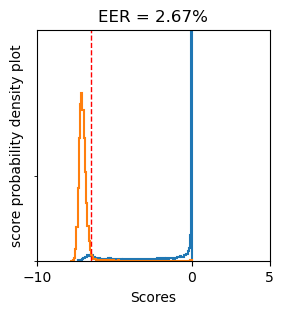

In [11]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_2_augall_asvspoof_2021_resnet_nll_2l_epoch_30.txt

EER: 2.6974%, threshold: -2.3644


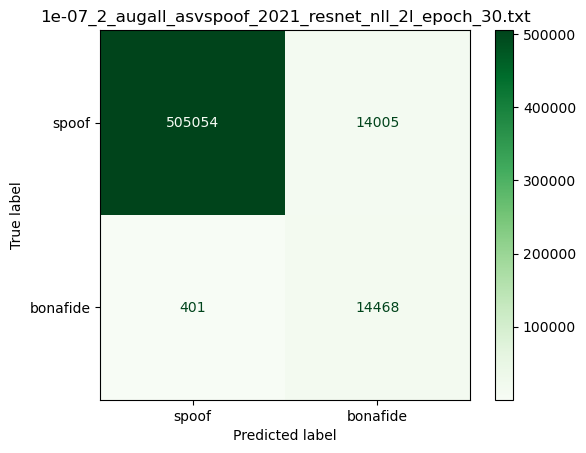

In [16]:

pred_df = pd.read_csv("docs/1e-07_2_augall_asvspoof_2021_resnet_nll_2l_epoch_30.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_2_augall_asvspoof_2021_resnet_nll_2l_epoch_30.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

5.205453395843506 -3.924323558807373


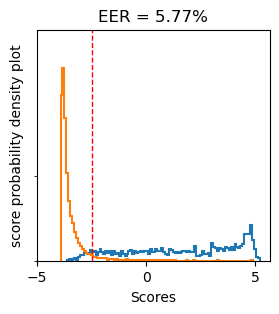

In [7]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_augall_asvspoof_2021_linear_nll_2l_epoch_43.txt

EER: 2.7119%, threshold: -7.0629


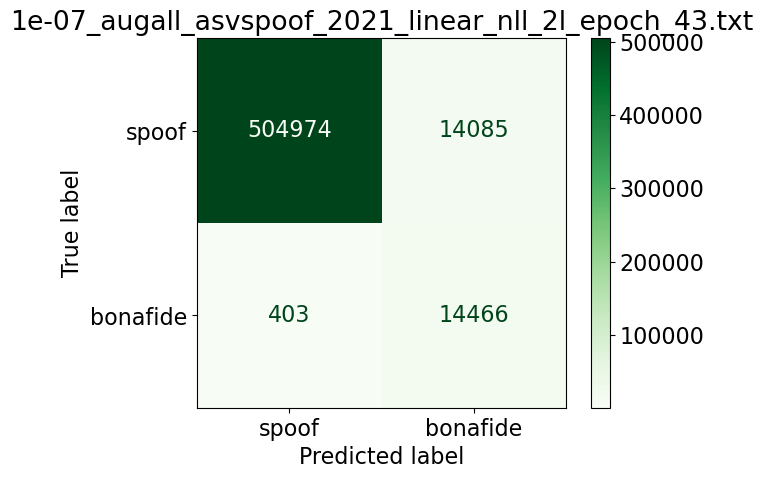

In [66]:

pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2021_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2021_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-0.0006621075444854 -8.591866493225098


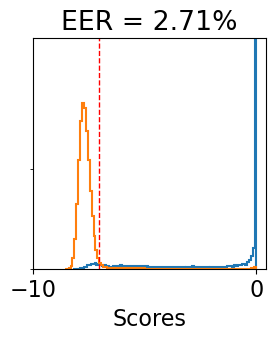

<Figure size 640x480 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0])
plt.yticks([])
plt.ylim(0,3)
# Displaying the plot
plt.show()

plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/augall_resnet_2l_epoch_58_dfhidden.pdf", dpi=600)

### 1e-07_augall_asvspoof_2021_resnet_nll_2l_epoch_58.txt

EER: 7.5256%, threshold: -4.1158


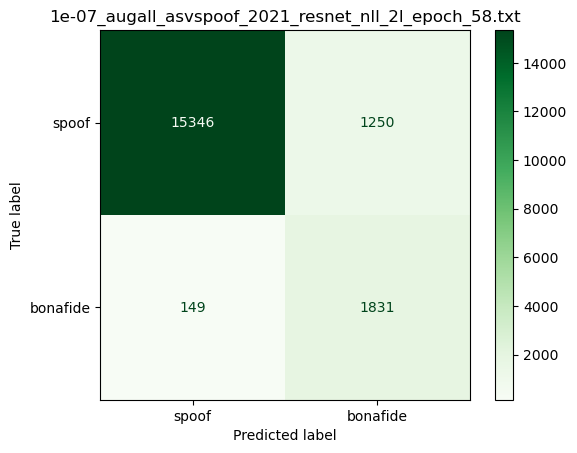

In [20]:

pred_df = pd.read_csv("docs/1e-07_augall_asvspoof_2021_resnet_nll_2l_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_asvspoof_2021_resnet_nll_2l_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.920905113220215 -4.869625568389893


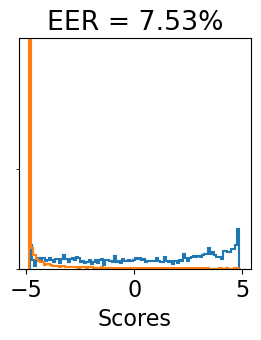

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,3)
# Displaying the plot
plt.show()

plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/augall_resnet_2l_epoch_58_dfhidden.pdf", dpi=600)

### 1e-07_asvspoof_2021_resnet_l2_all_epoch_15.txt

EER: 10.9661%, threshold: 2.6773


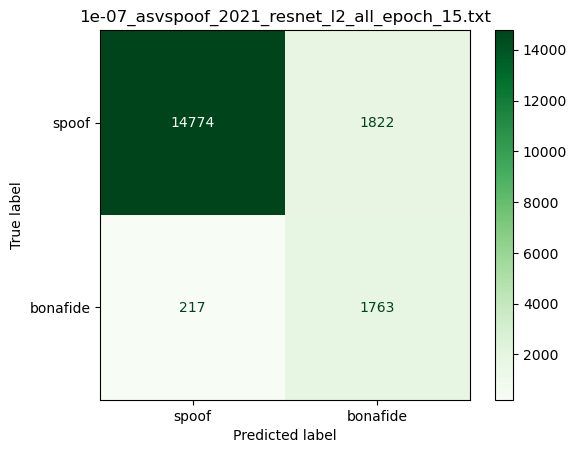

In [29]:

pred_df = pd.read_csv("docs/1e-07_asvspoof_2021_resnet_l2_all_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2021_resnet_l2_all_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_asvspoof_2021_resnet_l1_all_epoch_34.txt

EER: 13.0135%, threshold: -2.8792


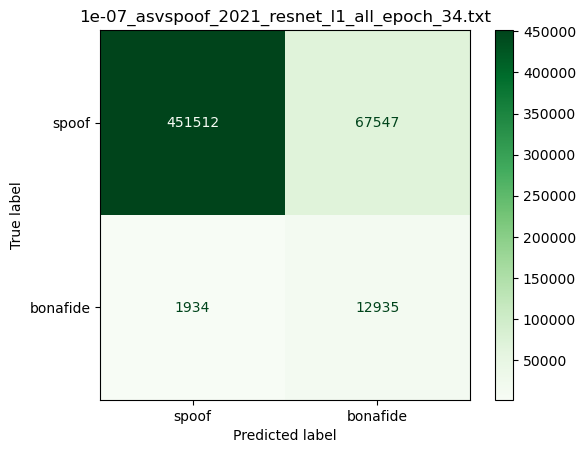

In [25]:

pred_df = pd.read_csv("docs/1e-07_asvspoof_2021_resnet_l1_all_epoch_34.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2021_resnet_l1_all_epoch_34.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_aug_asvspoof_2021_resnet_nll_online_2_epoch_26.txt

EER: 7.5810%, threshold: -4.3604


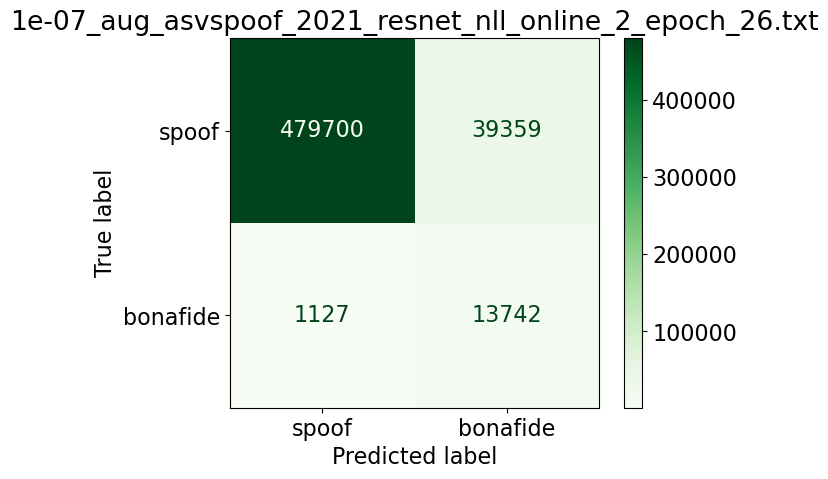

In [160]:

pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2021_resnet_nll_online_2_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2021_resnet_nll_online_2_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [161]:
res_df[res_df['label'] != res_df['pred']]['vocoder'].value_counts()

neural_vocoder_autoregressive       21459
traditional_vocoder                  9749
neural_vocoder_nonautoregressive     4099
unknown                              2409
waveform_concatenation               1643
bonafide                             1127
Name: vocoder, dtype: int64

4.063843250274658 -4.465519905090332


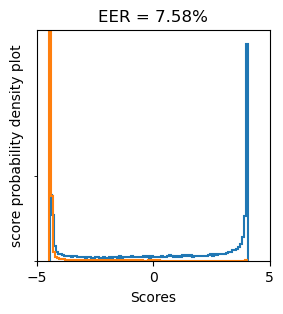

In [17]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2021_resnet_nll_2l_epoch_39.txt

EER: 10.8616%, threshold: -5.0076


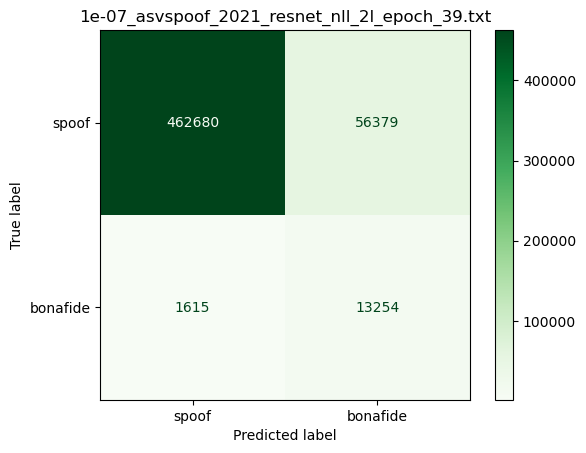

In [13]:

pred_df = pd.read_csv("docs/1e-07_asvspoof_2021_resnet_nll_2l_epoch_39.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2021_resnet_nll_2l_epoch_39.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.579471111297607 -5.213541507720947


/tmp/ipykernel_29106/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


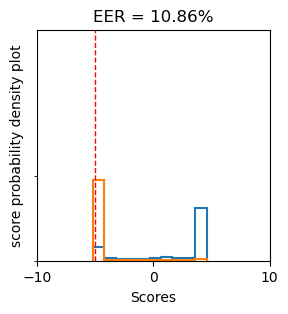

In [15]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt

EER: 15.4530%, threshold: -3.6697


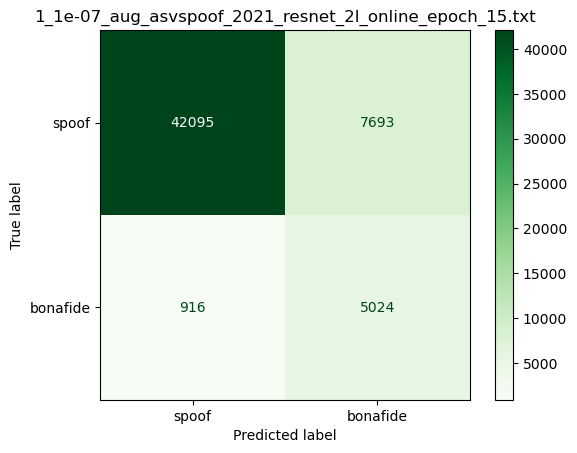

In [10]:

pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.579471111297607 -5.213541507720947


/tmp/ipykernel_29106/1261351821.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


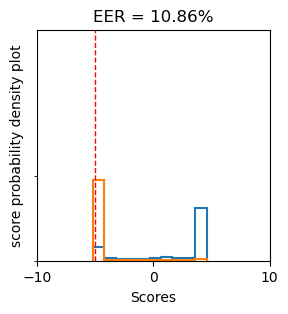

In [16]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=10, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### xinwang

EER: 4.0878%, threshold: -3.7308


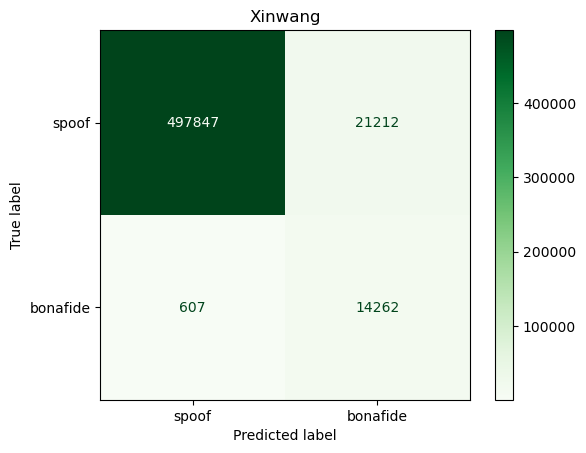

In [35]:
pred_df = pd.read_csv("/dataa/phucdt/vocodetect/xinwang_vocoders/project-NN-Pytorch-scripts/project/09-asvspoof-vocoded-trn/model-ID-7/config_train_toyset_ID_7/1234/log_eval_trained_DF2021_score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("Xinwang")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

7.117854 -8.868884


/tmp/ipykernel_1377737/3455971328.py:30: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)


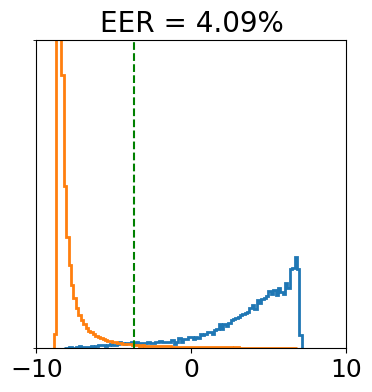

In [47]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/xinwang-df.pdf", dpi=600)
# Displaying the plot
plt.show()


In [151]:
res_df[res_df['label'] != res_df['pred']]['vocoder'].value_counts()

neural_vocoder_autoregressive       16190
traditional_vocoder                  1820
neural_vocoder_nonautoregressive     1311
waveform_concatenation               1063
unknown                               828
bonafide                              607
Name: vocoder, dtype: int64

7.117854 -8.868884


/tmp/ipykernel_1331806/2682280539.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)


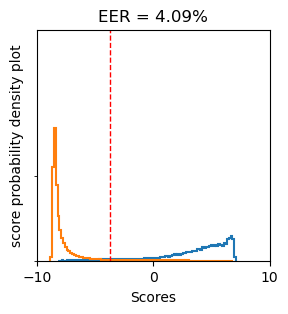

In [38]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1_1e-07_aug_asvspoof_2021_resnet_2l_epoch_18.txt

EER: 10.0208%, threshold: -3.0994


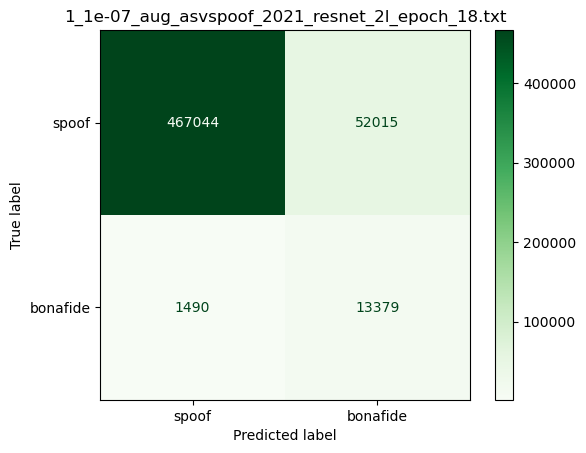

In [18]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2021_resnet_2l_epoch_18.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2021_resnet_2l_epoch_18.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt

EER: 15.4530%, threshold: -3.6697


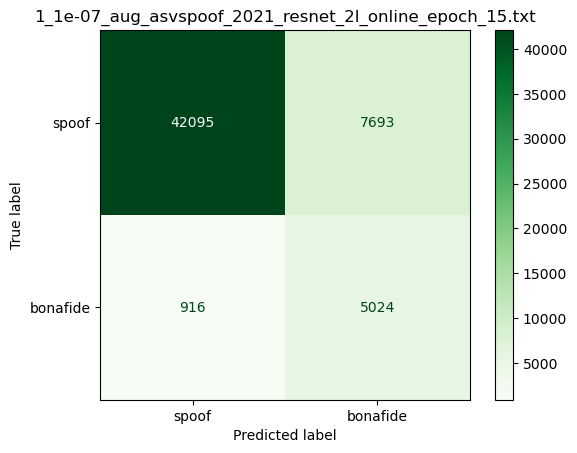

In [21]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2021_resnet_2l_online_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-07_aug_asvspoof_2021_linear_2l_epoch_12.txt

EER: 8.2056%, threshold: -1.7983


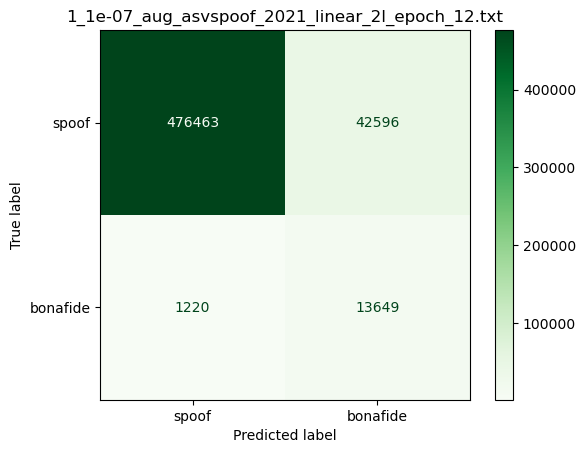

In [22]:
pred_df = pd.read_csv("docs/1_1e-07_aug_asvspoof_2021_linear_2l_epoch_12.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-07_aug_asvspoof_2021_linear_2l_epoch_12.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_asvspoof_2021_resnet_2l_all_epoch_21.txt

EER: 7.7887%, threshold: -4.3421


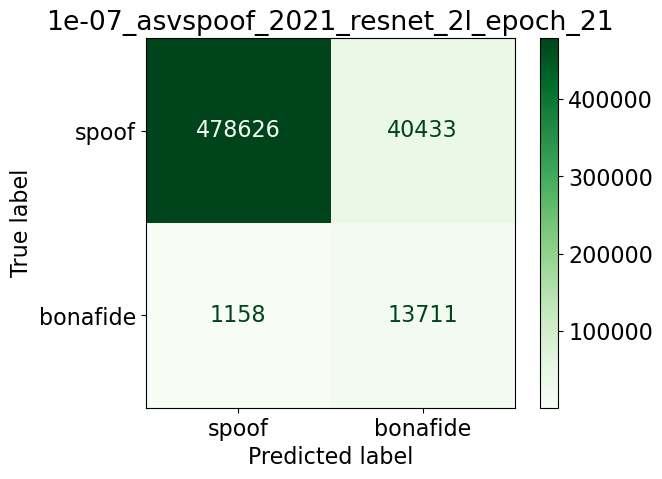

In [141]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2021_resnet_2l_all_epoch_21.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2021_resnet_2l_epoch_21")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [142]:
res_df[res_df['label'] != res_df['pred']]['vocoder'].value_counts()

neural_vocoder_autoregressive       20845
traditional_vocoder                 12618
neural_vocoder_nonautoregressive     3484
waveform_concatenation               1951
unknown                              1535
bonafide                             1158
Name: vocoder, dtype: int64

4.920905113220215 -4.869625568389893


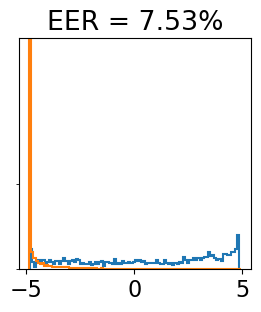

In [28]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
# plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
plt.rcParams.update({'font.size': 16})
# Displaying the plot
plt.savefig("figs/resnet_2l_epoch_58_dfhidden.pdf", dpi=600)
plt.show()


### 1e-07_aug_asvspoof_2021_linear_2l_online_epoch_13.txt

EER: 9.7544%, threshold: 2.4277


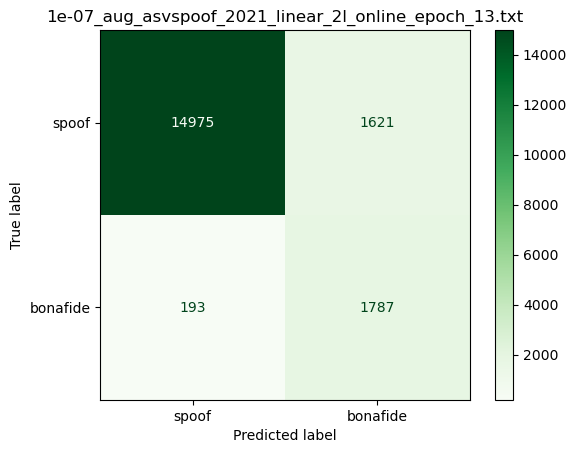

In [24]:
pred_df = pd.read_csv("docs/1e-07_aug_asvspoof_2021_linear_2l_online_epoch_13.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_asvspoof_2021_linear_2l_online_epoch_13.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [137]:
res_df[res_df['pred'] != res_df['label']]['vocoder'].value_counts()

neural_vocoder_autoregressive       974
traditional_vocoder                 310
bonafide                            173
waveform_concatenation               96
neural_vocoder_nonautoregressive     78
Name: vocoder, dtype: int64

4.428472995758057 -4.487799167633057


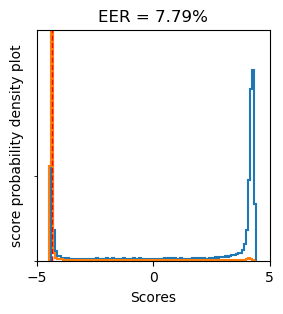

In [5]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-07_asvspoof_2021_resnet_2l_one_epoch_25.txt

EER: 9.4835%, threshold: -3.8764


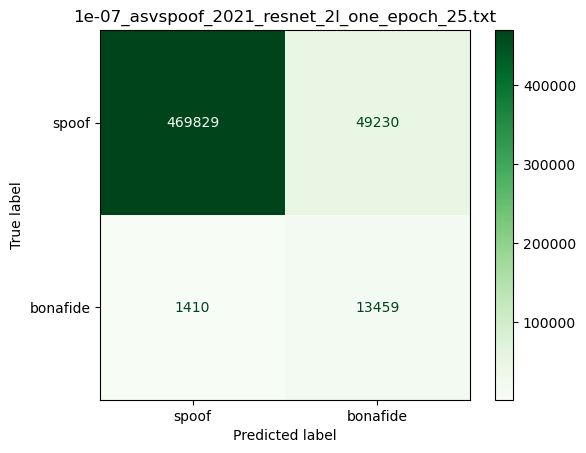

In [19]:
pred_df = pd.read_csv("docs/1e-07_asvspoof_2021_resnet_2l_one_epoch_25.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_asvspoof_2021_resnet_2l_one_epoch_25.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 9.8471%, threshold: -2.7487


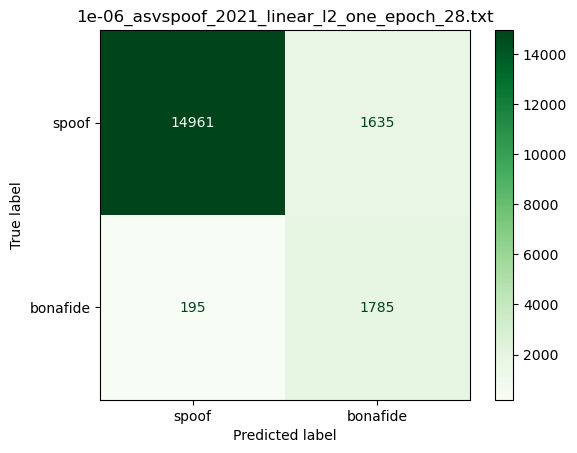

In [6]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_l2_one_epoch_28.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_l2_one_epoch_28.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 11.1910%, threshold: -3.6626


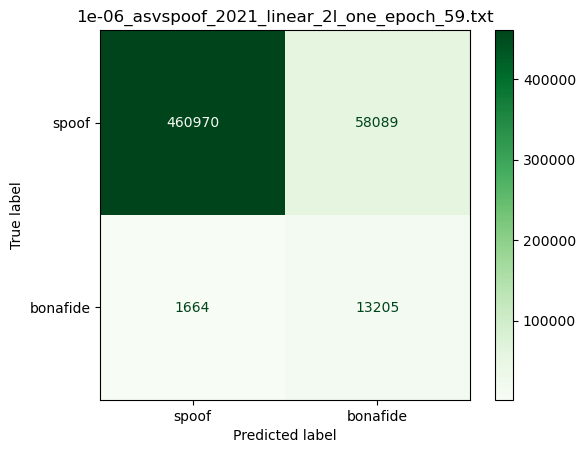

In [10]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_2l_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['eval', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_2l_one_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 13.6975%, threshold: -3.7681


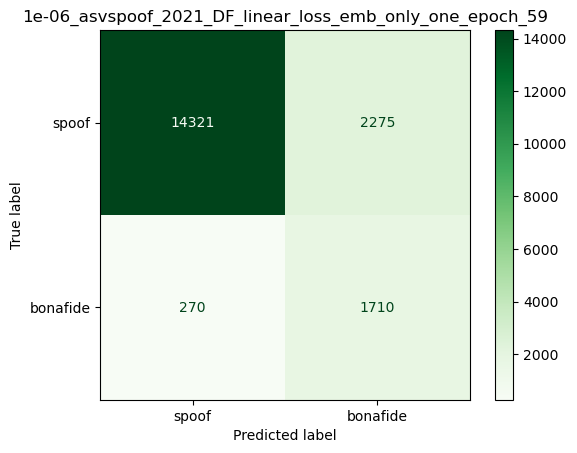

In [14]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_loss_emb_only_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['progress', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_DF_linear_loss_emb_only_one_epoch_59")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 11.1171%, threshold: -1.5243


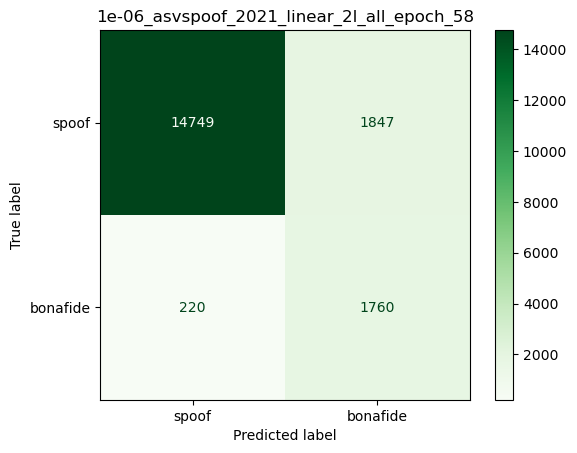

In [8]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_2l_all_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['progress', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_2l_all_epoch_58")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 12.3721%, threshold: -3.4325


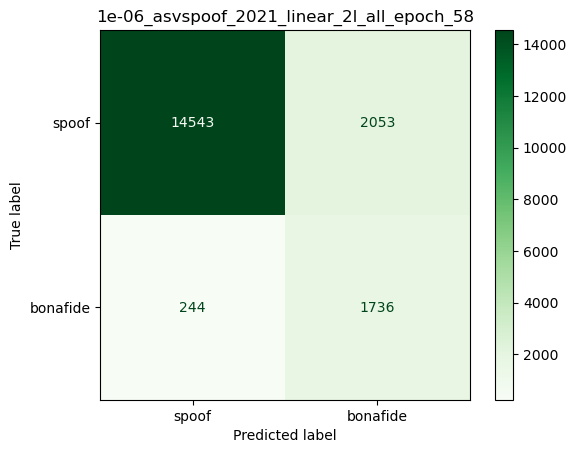

In [9]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_l2_all_epoch_40.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['progress', 'hidden']
res_df = res_df[res_df['subset'] == 'hidden']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_2l_all_epoch_58")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 9.9805%, threshold: -2.8412


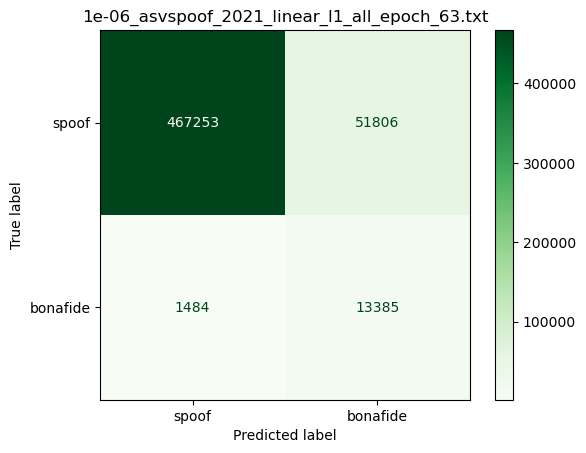

: 

In [4]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_l1_all_epoch_63.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['progress', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_l1_all_epoch_63.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 9.4155%, threshold: -4.7226


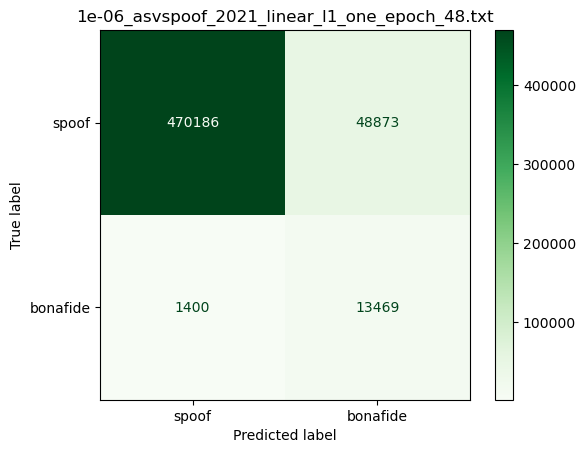

In [4]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2021_linear_l1_one_epoch_48.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0].split('/')[-1])
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(DF_df, pred_df, on='utt')

# filter res_df as subset = ['progress', 'hidden']
res_df = res_df[res_df['subset'] == 'eval']

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2021_linear_l1_one_epoch_48.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

## In The Wild

In [66]:
# load in the wild protocol
in_the_wild = pd.read_csv("../traindata/in_the_wild/protocol.txt", sep=" ", header=None)
in_the_wild.columns = ['utt', 'subset', 'label']
in_the_wild.head

<bound method NDFrame.head of                  utt subset     label
0          wav/1.wav   eval     spoof
1          wav/2.wav   eval     spoof
2          wav/3.wav   eval     spoof
3          wav/4.wav   eval  bonafide
4          wav/5.wav   eval  bonafide
...              ...    ...       ...
31773  wav/31774.wav   eval  bonafide
31774  wav/31775.wav   eval  bonafide
31775  wav/31776.wav   eval  bonafide
31776  wav/31777.wav   eval  bonafide
31777  wav/31778.wav   eval     spoof

[31778 rows x 3 columns]>

### AASIST-SSL inthewild

EER: 10.4788%, threshold: -3.5562


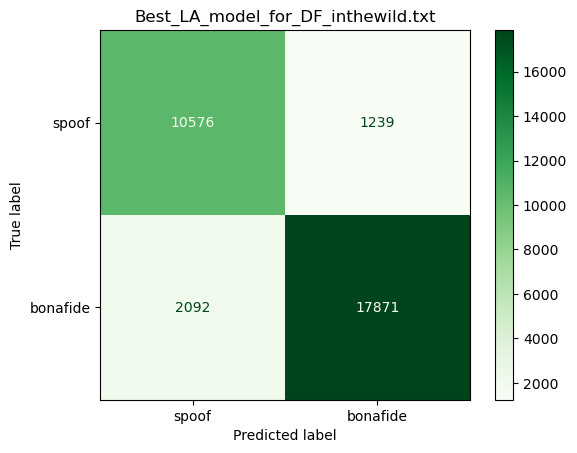

In [70]:
pred_df = pd.read_csv("/dataa/phucdt/SSL_Anti-spoofing/res/Best_LA_model_for_DF_inthewild.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("Best_LA_model_for_DF_inthewild.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.690298557281494 -3.815593004226685


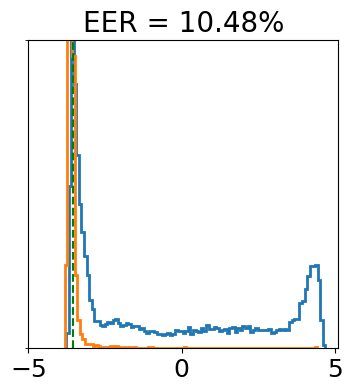

In [72]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/aasist-inwild.pdf", dpi=600)
# Displaying the plot
plt.show()


### 1e-07_3_augall_inthewild_linear_nll_2l_epoch_46.txt

EER: 4.5098%, threshold: -2.0041


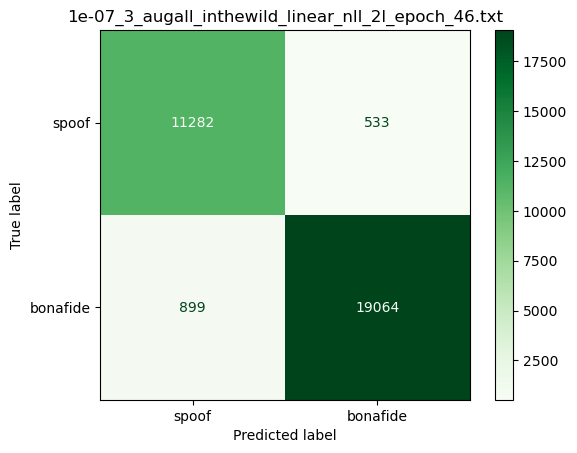

In [67]:
pred_df = pd.read_csv("docs/1e-07_3_augall_inthewild_linear_nll_2l_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_inthewild_linear_nll_2l_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-0.000749307218939 -7.524268627166748


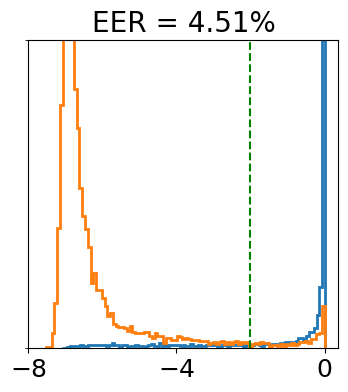

In [68]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(4, 4))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=2, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores', fontsize=20)
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100), fontsize=20)


# yaxis logit scale
plt.yscale('symlog')


# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='g', linestyle='--', linewidth=1.5)

# Set the x-axis tick positions and labels
plt.xticks([-8,-4,0], fontsize=18)
plt.yticks([])
plt.ylim(0,1)
# save fig
plt.savefig("figs/conf-3-linear-inwild.pdf", dpi=600)
# Displaying the plot
plt.show()


### 1e-07_3_augall_inthewild_resnet_nll_2l_epoch_49.txt

EER: 4.8586%, threshold: -4.4565


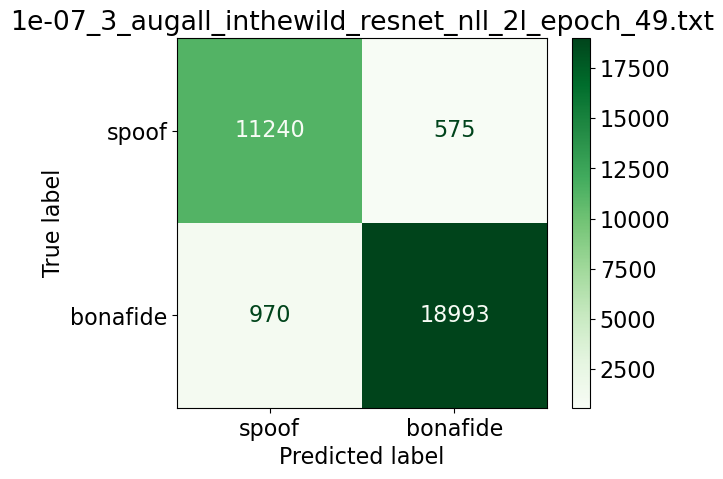

In [60]:
pred_df = pd.read_csv("docs/1e-07_3_augall_inthewild_resnet_nll_2l_epoch_49.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_inthewild_resnet_nll_2l_epoch_49.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_aug_inthewild_resnet_nll_online_2_epoch_26.txt

EER: 8.0150%, threshold: -0.3514


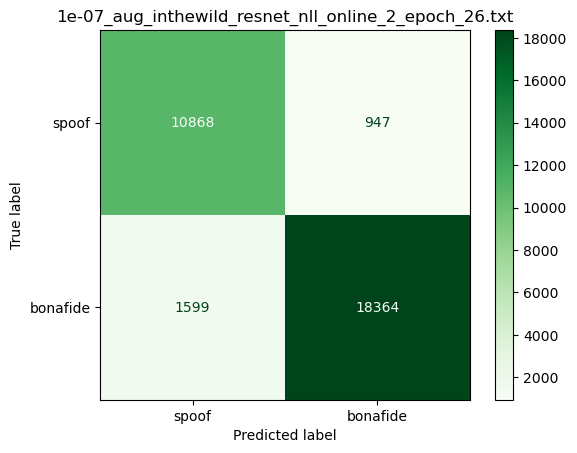

In [7]:
pred_df = pd.read_csv("docs/1e-07_aug_inthewild_resnet_nll_online_2_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_inthewild_resnet_nll_online_2_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_aug_inthewild_linear_nll_2l_online_epoch_46.txt

EER: 6.8886%, threshold: -0.5014


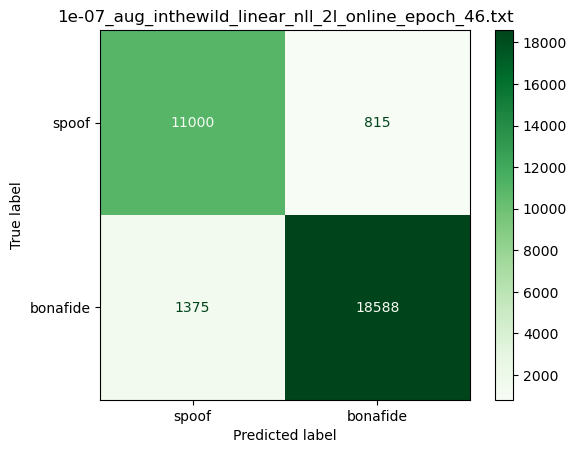

In [3]:
pred_df = pd.read_csv("docs/1e-07_aug_inthewild_linear_nll_2l_online_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_inthewild_linear_nll_2l_online_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_augall_inthewild_linear_nll_2l_epoch_43.txt

EER: 4.2324%, threshold: -6.4996


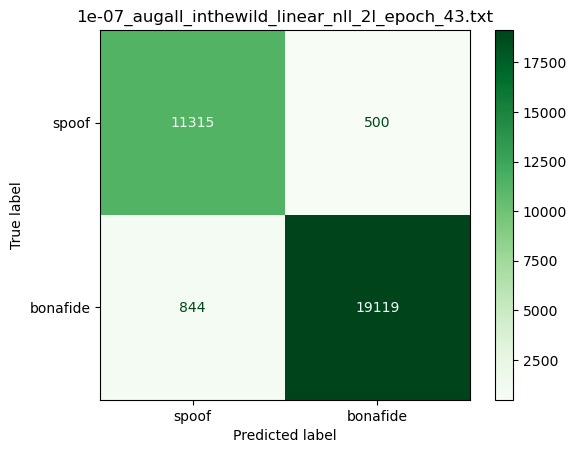

In [67]:
pred_df = pd.read_csv("docs/1e-07_augall_inthewild_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_inthewild_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_augall_inthewild_resnet_nll_2l_epoch_58.txt

EER: 7.5678%, threshold: -3.7149


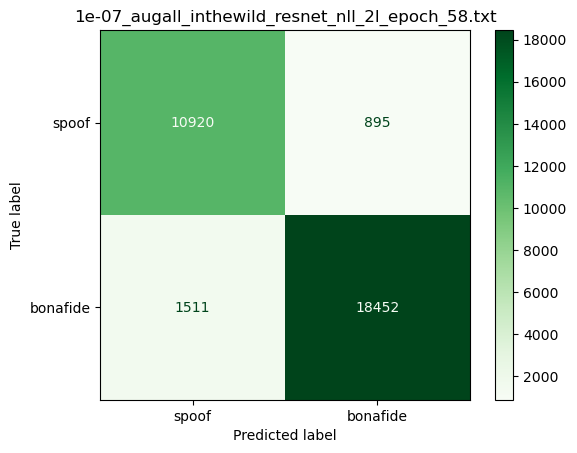

In [48]:
pred_df = pd.read_csv("docs/1e-07_augall_inthewild_resnet_nll_2l_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_inthewild_resnet_nll_2l_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_inthewild_resnet_l2_all_epoch_15.txt

EER: 16.1150%, threshold: 4.0155


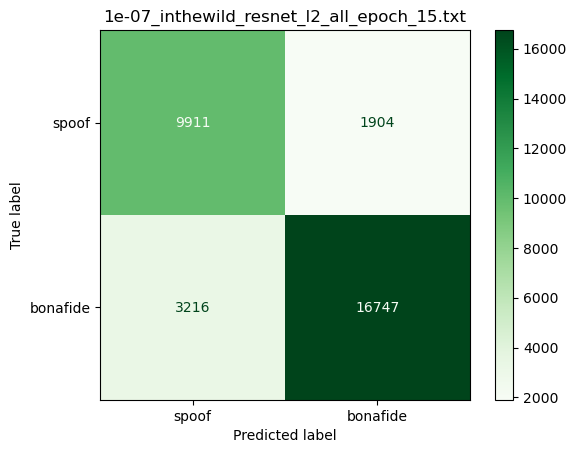

In [17]:
pred_df = pd.read_csv("docs/1e-07_inthewild_resnet_l2_all_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_inthewild_resnet_l2_all_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_inthewild_resnet_l1_all_epoch_34.txt

EER: 10.9924%, threshold: -1.8451


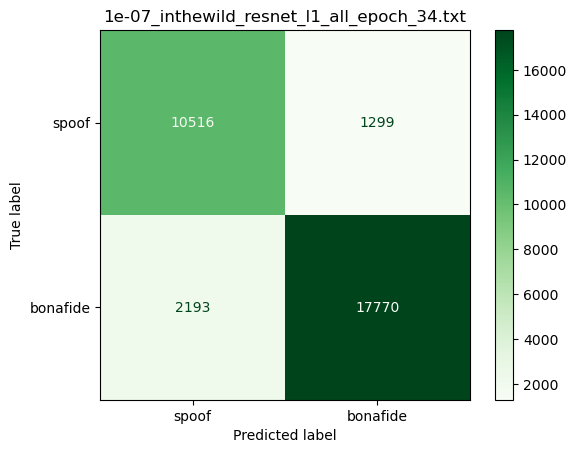

In [4]:
pred_df = pd.read_csv("docs/1e-07_inthewild_resnet_l1_all_epoch_34.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_inthewild_resnet_l1_all_epoch_34.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_inthewild_resnet_2l_all_epoch_21.txt

EER: 8.8707%, threshold: 0.7052


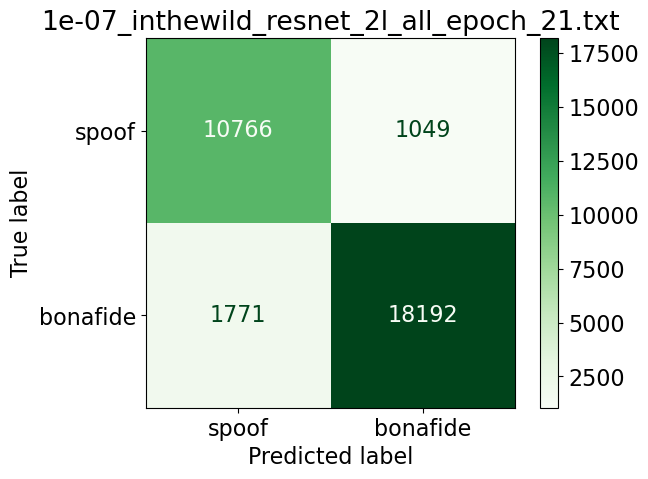

In [48]:
pred_df = pd.read_csv("docs/1e-07_inthewild_resnet_2l_all_epoch_21.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_inthewild_resnet_2l_all_epoch_21.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.479396343231201 -4.464225769042969
19963 11815


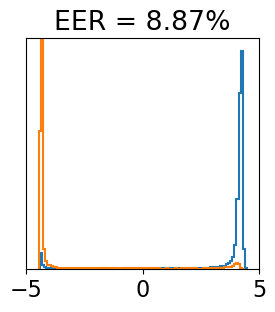

In [49]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']
print(len(bona), len(spoof))

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
# plt.xlabel('Scores')
# plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# Adding a legend
# plt.legend(loc='lower right')

# Set the x-axis tick positions and labels
# plt.axvline(x=threshold, color='r', linestyle='--')
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,4)
plt.rcParams.update({'font.size': 16})
plt.savefig("figs/resnet_2l_epoch_21_inthewild.pdf", dpi=600)
# Displaying the plot
plt.show()


### 1e-07_inthewild_resnet_2l_one_epoch_25.txt

EER: 8.9968%, threshold: 4.2077


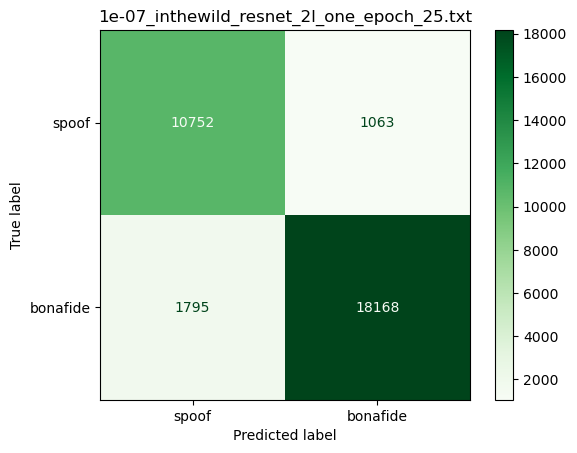

In [13]:
pred_df = pd.read_csv("docs/1e-07_inthewild_resnet_2l_one_epoch_25.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_inthewild_resnet_2l_one_epoch_25.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_inthewild_linear_l2_one_epoch_28.txt

EER: 8.8018%, threshold: -2.3179


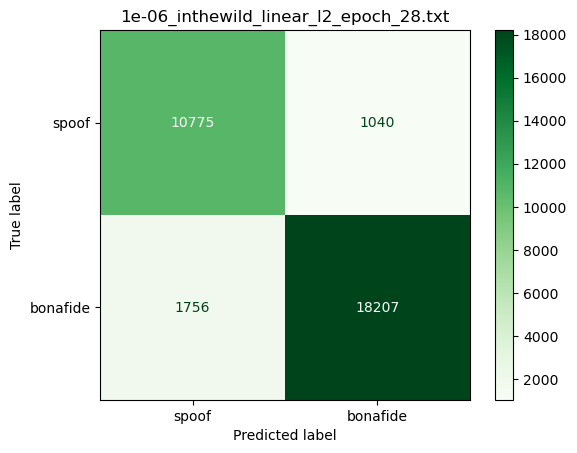

In [141]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_l2_one_epoch_28.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_l2_epoch_28.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.065072536468506 -4.003798007965088


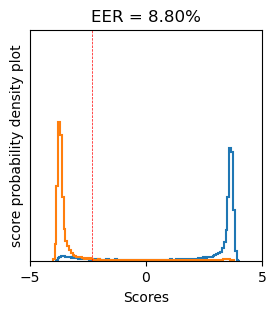

In [143]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=0.5)

# Set the x-axis tick positions and labels
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


EER: 10.9352%, threshold: -2.0202


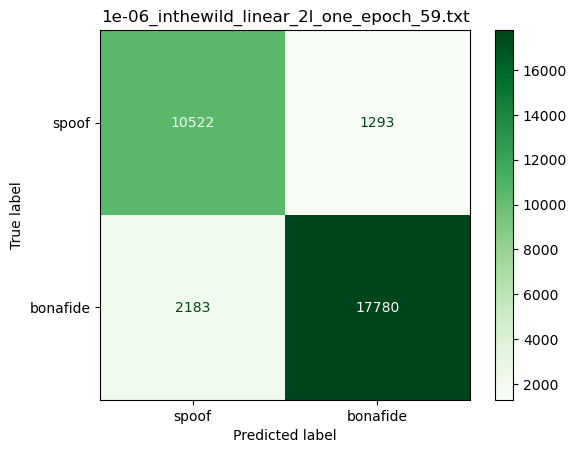

In [15]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_2l_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_2l_one_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 9.1919%, threshold: -3.1302


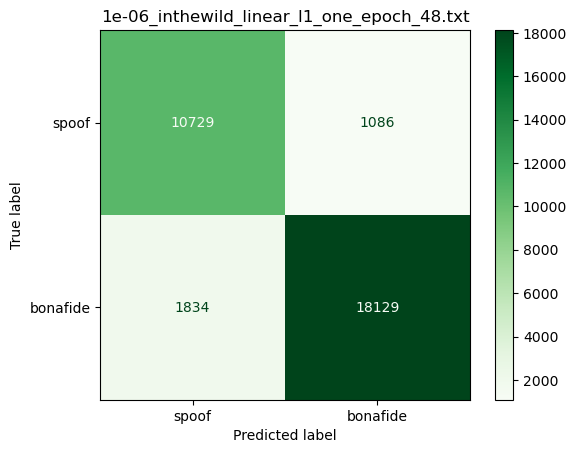

In [6]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_l1_one_epoch_48.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_l1_one_epoch_48.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 10.9512%, threshold: -3.1834


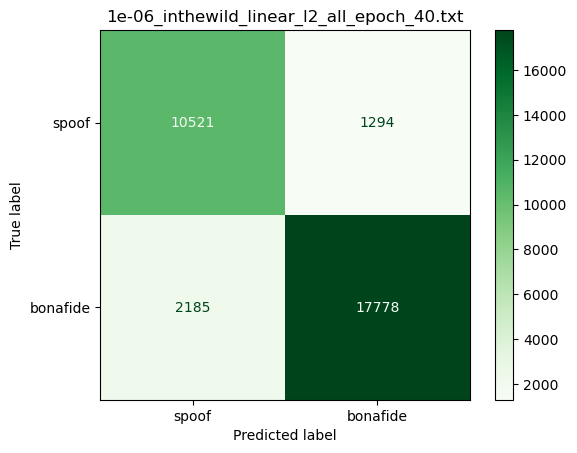

In [4]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_l2_all_epoch_40.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_l2_all_epoch_40.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 11.4169%, threshold: -1.9069


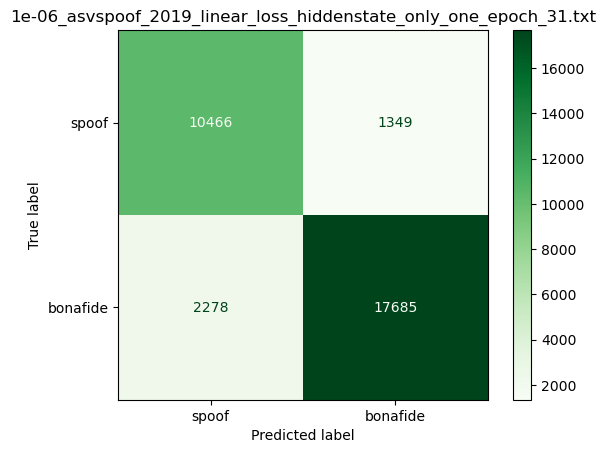

In [15]:
pred_df = pd.read_csv("docs/1e-06_asvspoof_2019_linear_loss_hiddenstate_only_one_epoch_31.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_asvspoof_2019_linear_loss_hiddenstate_only_one_epoch_31.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 12.5870%, threshold: -1.8455


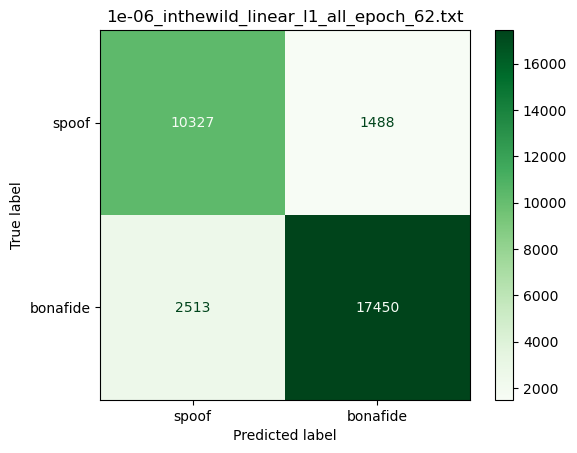

In [6]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_l1_all_epoch_62.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_l1_all_epoch_62.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 10.1232%, threshold: -2.2264


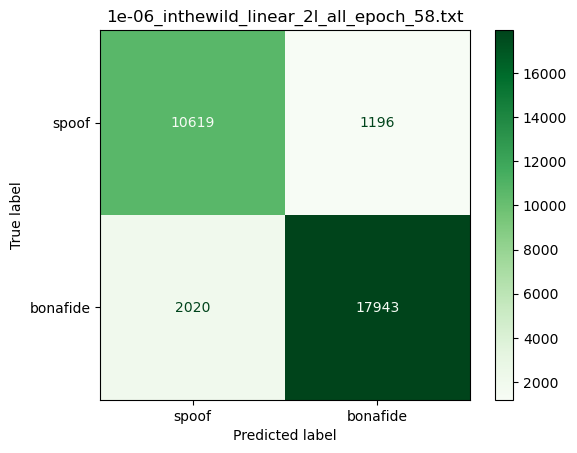

In [7]:
pred_df = pd.read_csv("docs/1e-06_inthewild_linear_2l_all_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(in_the_wild, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_inthewild_linear_2l_all_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

## SDS2023

In [62]:
# load SDS2023 protocol

sds2023 = pd.read_csv("../traindata/SDS2023/protocol.txt", sep=" ", header=None)
sds2023.columns = ['utt', 'subset', 'label']
sds2023.head
# sds2023['label'] = sds2023['utt'].apply(lambda x: "spoof" if "Fake" in x.split('/')[0] else "bonafide")
# sds2023.to_csv("../traindata/SDS2023/protocol.txt",sep= ' ', index=False, header=False)

<bound method NDFrame.head of                                      utt subset     label
0      Datasets_Real/real/real_00001.wav   eval  bonafide
1      Datasets_Real/real/real_00002.wav   eval  bonafide
2      Datasets_Real/real/real_00003.wav   eval  bonafide
3      Datasets_Real/real/real_00004.wav   eval  bonafide
4      Datasets_Real/real/real_00005.wav   eval  bonafide
...                                  ...    ...       ...
82963   Datasets_Fake/WaveGlow_13096.wav   eval     spoof
82964   Datasets_Fake/WaveGlow_13097.wav   eval     spoof
82965   Datasets_Fake/WaveGlow_13098.wav   eval     spoof
82966   Datasets_Fake/WaveGlow_13099.wav   eval     spoof
82967   Datasets_Fake/WaveGlow_13100.wav   eval     spoof

[82968 rows x 3 columns]>

### 1e-07_3_augall_SDS2023_linear_nll_2l_epoch_46.txt

EER: 2.3369%, threshold: -0.0020


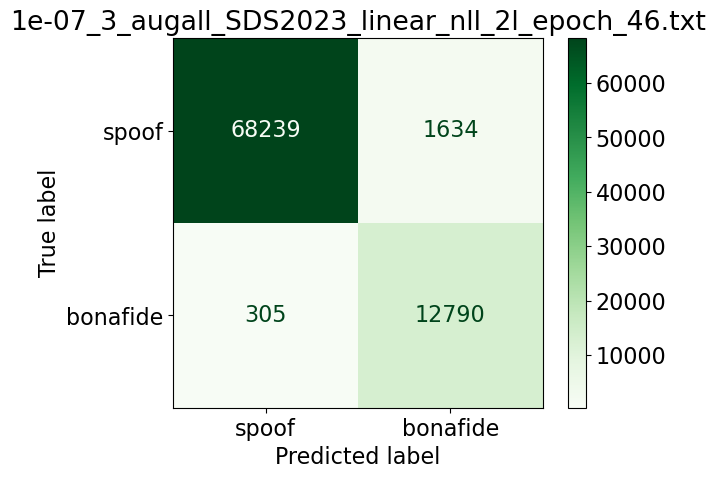

In [71]:
pred_df = pd.read_csv("docs/1e-07_3_augall_SDS2023_linear_nll_2l_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_SDS2023_linear_nll_2l_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_3_augall_SDS2023_resnet_nll_2l_epoch_49.txt

EER: 3.8627%, threshold: 5.0232


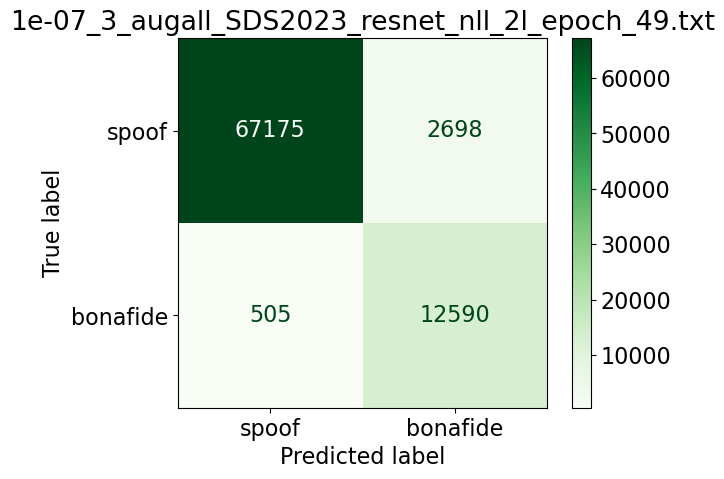

In [63]:
pred_df = pd.read_csv("docs/1e-07_3_augall_SDS2023_resnet_nll_2l_epoch_49.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_3_augall_SDS2023_resnet_nll_2l_epoch_49.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_aug_SDS2023_resnet_nll_online_2_epoch_26.txt

EER: 4.6879%, threshold: 3.9606


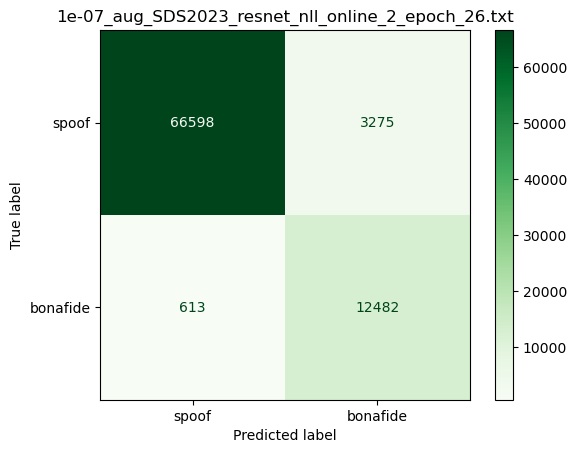

In [6]:
pred_df = pd.read_csv("docs/1e-07_aug_SDS2023_resnet_nll_online_2_epoch_26.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_SDS2023_resnet_nll_online_2_epoch_26.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_aug_SDS2023_linear_nll_2l_online_epoch_46.txt

EER: 13.3042%, threshold: -0.0010


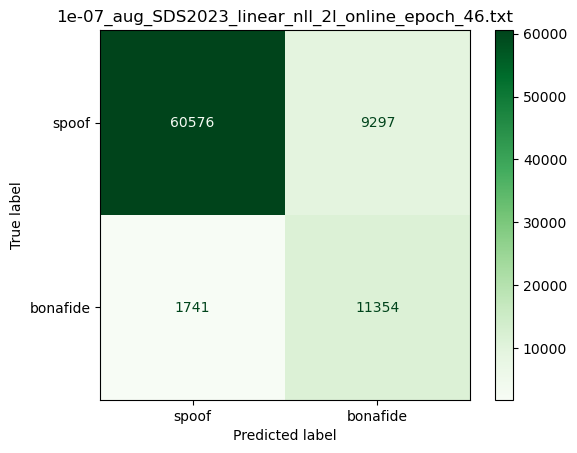

In [5]:
pred_df = pd.read_csv("docs/1e-07_aug_SDS2023_linear_nll_2l_online_epoch_46.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_aug_SDS2023_linear_nll_2l_online_epoch_46.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_augall_SDS2023_linear_nll_2l_epoch_43.txt

EER: 2.7108%, threshold: -0.0099


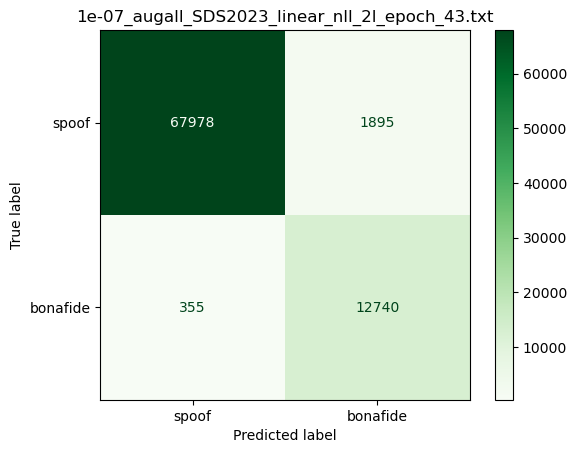

In [14]:
pred_df = pd.read_csv("docs/1e-07_augall_SDS2023_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_SDS2023_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_augall_SDS2023_resnet_nll_2l_epoch_58.txt

EER: 4.4064%, threshold: 4.4259


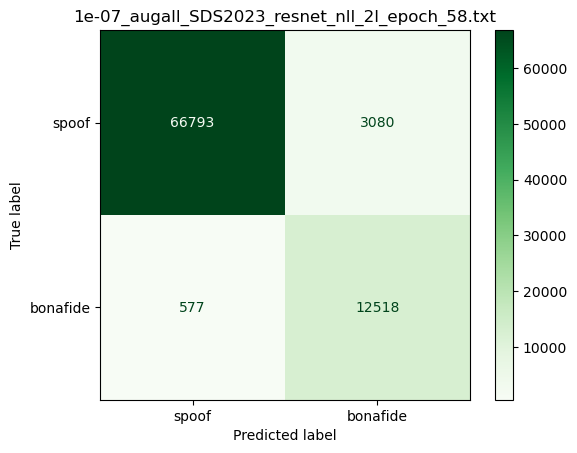

In [50]:
pred_df = pd.read_csv("docs/1e-07_augall_SDS2023_resnet_nll_2l_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_SDS2023_resnet_nll_2l_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_SDS2023_resnet_l2_all_epoch_15.txt

EER: 8.5447%, threshold: 4.0196


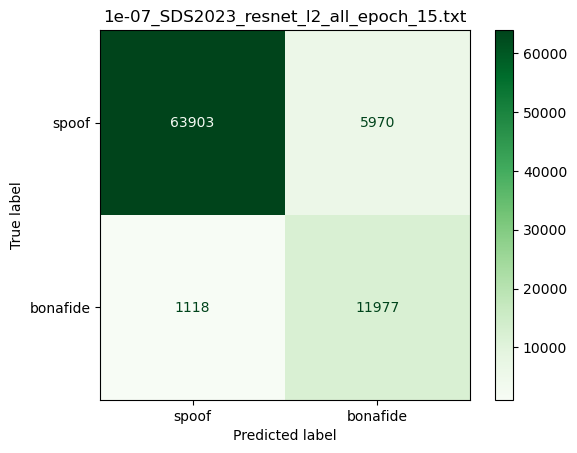

In [12]:
pred_df = pd.read_csv("docs/1e-07_SDS2023_resnet_l2_all_epoch_15.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_SDS2023_resnet_l2_all_epoch_15.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-07_SDS2023_resnet_l1_all_epoch_34.txt

EER: 10.5912%, threshold: 2.6207


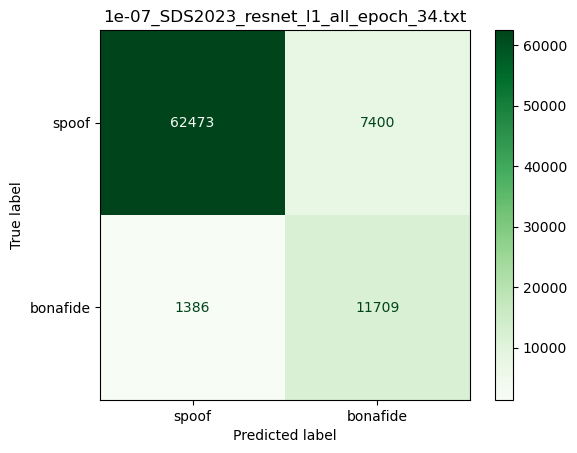

In [8]:
# 1e-07_SDS2023_resnet_l1_all_epoch_34.txt
pred_df = pd.read_csv("docs/1e-07_SDS2023_resnet_l1_all_epoch_34.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_SDS2023_resnet_l1_all_epoch_34.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### Xinwang

EER: 2.2009%, threshold: 0.5464


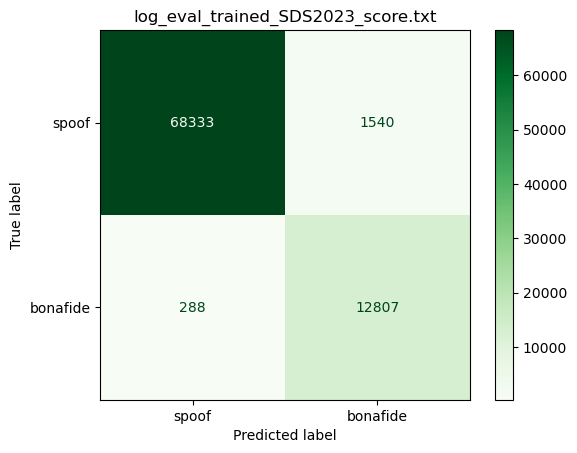

In [18]:
pred_df = pd.read_csv("/dataa/phucdt/vocodetect/xinwang_vocoders/project-NN-Pytorch-scripts/project/09-asvspoof-vocoded-trn/model-ID-7/config_train_toyset_ID_7/1234/log_eval_trained_SDS2023_score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
pred_df['label'] = pred_df['utt'].apply(lambda x: "bonafide" if "real" in x else "spoof")

res_df = pred_df
# merge eval_df and pred_df on utt
# res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("log_eval_trained_SDS2023_score.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [153]:
sds2023['vocoder'] = sds2023['utt'].apply(lambda x: ''.join(x.split('/')[-1].split('.')[0].split('_')[:-1]))
a = sds2023['vocoder'].value_counts()
for i in a.index:
    print(i, a[i])

FullbandMelGAN 13100
MultibandMelGAN 13100
HiFiGAN 13096
real 13095
ParallelWaveGAN 12940
WaveGlow 12916
MelGAN 4721


### 1e-07_SDS2023_resnet_2l_all_epoch_21.txt

EER: 4.5682%, threshold: 4.1063


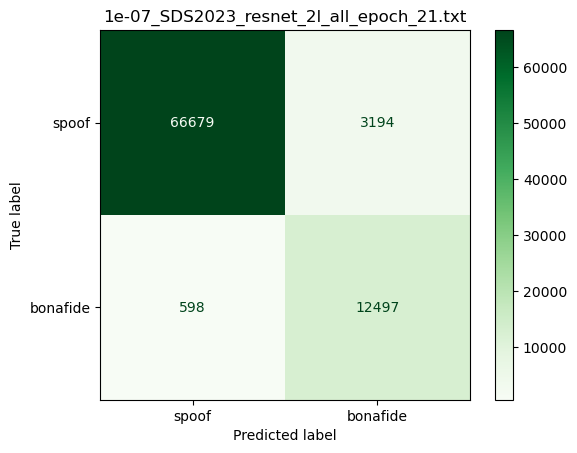

In [160]:
pred_df = pd.read_csv("docs/1e-07_SDS2023_resnet_2l_all_epoch_21.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_SDS2023_resnet_2l_all_epoch_21.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

4.294429302215576 -4.411316871643066
13095 69873


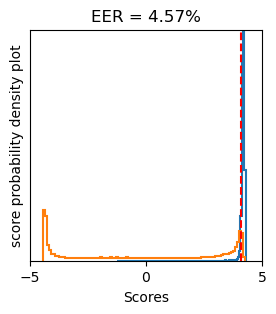

In [161]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']
print(len(bona), len(spoof))

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# Adding a legend
# plt.legend(loc='lower right')

# Set the x-axis tick positions and labels
plt.axvline(x=threshold, color='r', linestyle='--')
plt.xticks([-5,0,5])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()
plt.close()


### 1e-07_SDS2023_resnet_2l_one_epoch_25.txt

EER: 19.7099%, threshold: 4.5289


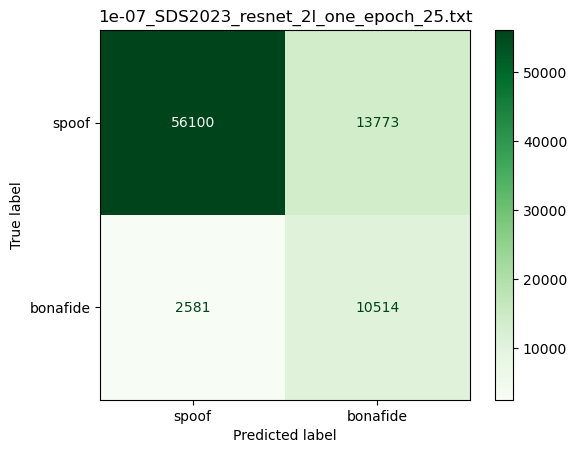

In [25]:
pred_df = pd.read_csv("docs/1e-07_SDS2023_resnet_2l_one_epoch_25.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_SDS2023_resnet_2l_one_epoch_25.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_SDS2023_linear_l2_one_epoch_28.txt

EER: 5.3166%, threshold: 3.0060


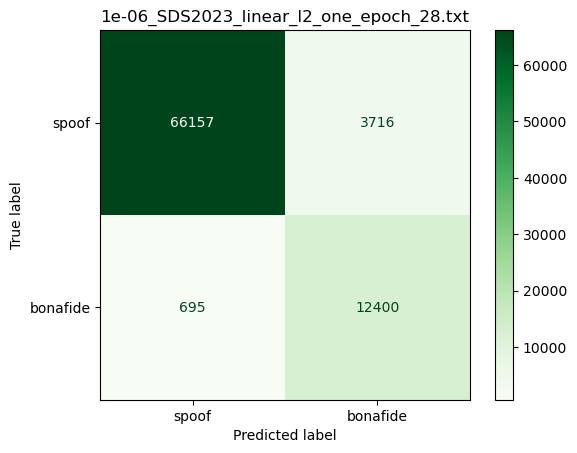

In [8]:
pred_df = pd.read_csv("docs/1e-06_SDS2023_linear_l2_one_epoch_28.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_SDS2023_linear_l2_one_epoch_28.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_SDS2023_linear_2l_one_epoch_59.txt

EER: 10.0253%, threshold: 3.8879


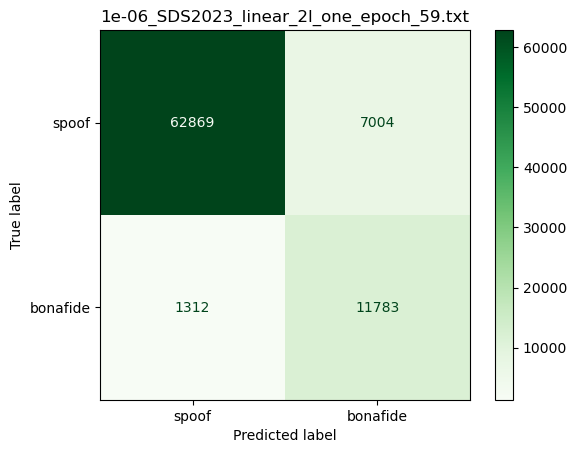

In [13]:
pred_df = pd.read_csv("docs/1e-06_SDS2023_linear_2l_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_SDS2023_linear_2l_one_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1e-06_SDS2023_linear_loss_emb_only_one_epoch_59.txt

EER: 10.2403%, threshold: -0.4283


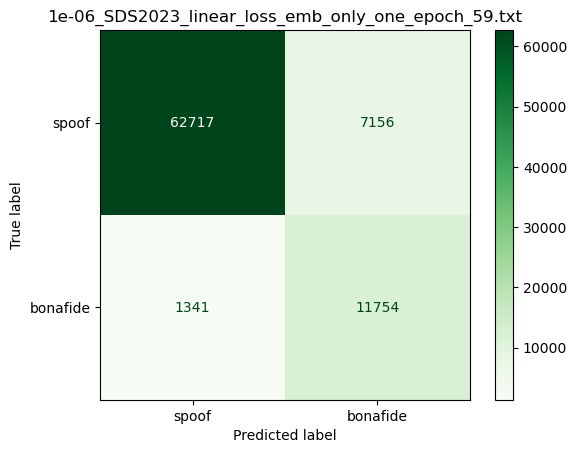

In [5]:
pred_df = pd.read_csv("docs/1e-06_SDS2023_linear_loss_emb_only_one_epoch_59.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_SDS2023_linear_loss_emb_only_one_epoch_59.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-06_SDS2023_linear_loss_hiddenstate_only_one_epoch_31.txt

EER: 8.2491%, threshold: 2.4710


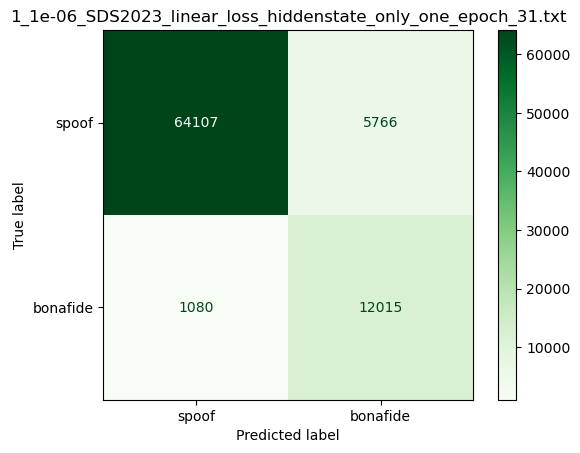

In [6]:
pred_df = pd.read_csv("docs/1_1e-06_SDS2023_linear_loss_hiddenstate_only_one_epoch_31.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-06_SDS2023_linear_loss_hiddenstate_only_one_epoch_31.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-06_SDS2023_linear_2l_all_epoch_58.txt

EER: 8.7730%, threshold: 3.3017


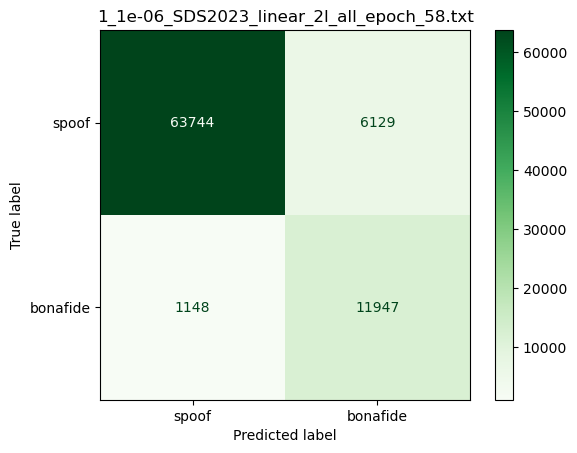

In [7]:
pred_df = pd.read_csv("docs/1_1e-06_SDS2023_linear_2l_all_epoch_58.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-06_SDS2023_linear_2l_all_epoch_58.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-06_SDS2023_linear_l1_all_epoch_63.txt

EER: 8.3769%, threshold: 3.1019


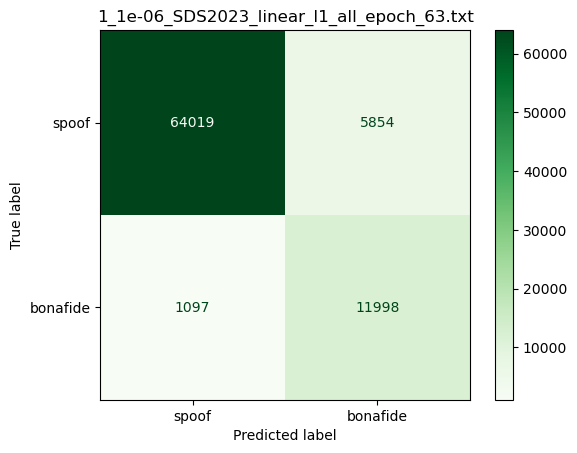

In [8]:
pred_df = pd.read_csv("docs/1_1e-06_SDS2023_linear_l1_all_epoch_63.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-06_SDS2023_linear_l1_all_epoch_63.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-06_SDS2023_linear_l2_all_epoch_40.txt

EER: 9.2022%, threshold: 3.6279


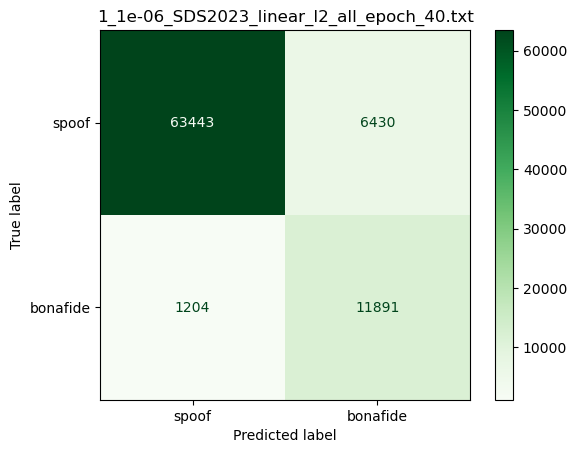

In [9]:
pred_df = pd.read_csv("docs/1_1e-06_SDS2023_linear_l2_all_epoch_40.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-06_SDS2023_linear_l2_all_epoch_40.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

### 1_1e-06_SDS2023_linear_l1_one_epoch_48.txt

EER: 6.4516%, threshold: 4.0785


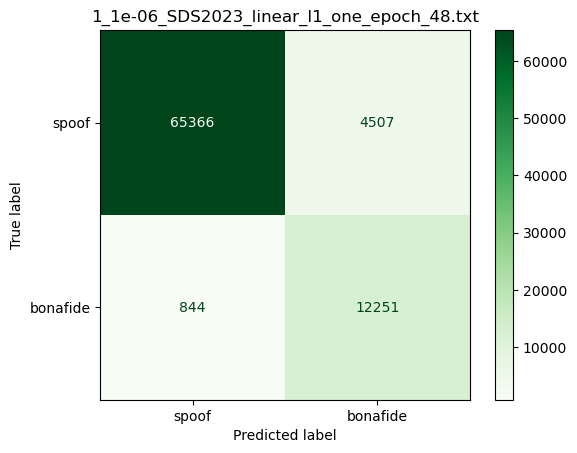

In [12]:
pred_df = pd.read_csv("docs/1_1e-06_SDS2023_linear_l1_one_epoch_48.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(sds2023, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1_1e-06_SDS2023_linear_l1_one_epoch_48.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

## Intern 

In [12]:
# load Intern

intern = pd.read_csv("../traindata/intern/protocol.txt", sep=" ", header=None)
intern.columns = ['utt', 'subset', 'label']
intern.head

<bound method NDFrame.head of                 utt subset     label
0         wav/3.wav   eval  bonafide
1        wav/60.wav   eval  bonafide
2        wav/14.wav   eval     spoof
3        wav/27.wav   eval     spoof
4         wav/1.wav   eval  bonafide
..              ...    ...       ...
413  wav/202301.wav   eval  bonafide
414  wav/103103.wav   eval  bonafide
415  wav/103505.wav   eval  bonafide
416  wav/102803.wav   eval  bonafide
417  wav/102404.wav   eval  bonafide

[418 rows x 3 columns]>

### 1e-07_augall_intern_linear_nll_2l_epoch_43.txt

EER: 23.9593%, threshold: -0.0096


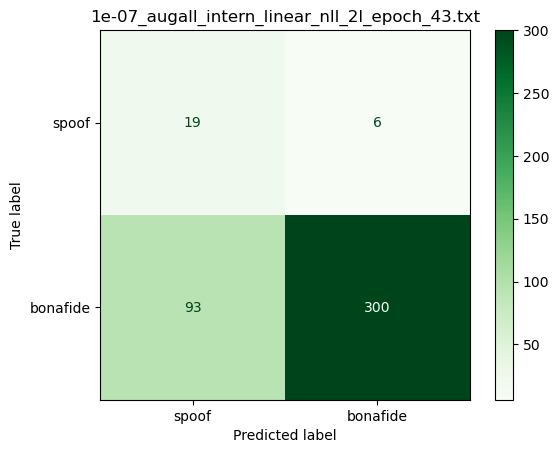

In [21]:
pred_df = pd.read_csv("docs/1e-07_augall_intern_linear_nll_2l_epoch_43.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(intern, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-07_augall_intern_linear_nll_2l_epoch_43.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

-0.0008001701789908 -7.979177474975586


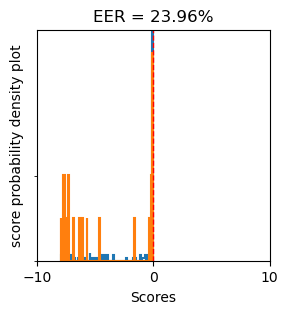

In [23]:
import matplotlib.pyplot as plt
import numpy as np

max_score = max(res_df['score'])
min_score = min(res_df['score'])
print(max_score, min_score)

plt.figure(figsize=(3, 3))
bona = res_df[(res_df['label'] == 'bonafide')]['score']
spoof = res_df[(res_df['label'] == 'spoof')]['score']

# Plotting the distributions as line chart histograms
plt.hist(bona, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Bonafide')
plt.hist(spoof, bins=100, density=True, cumulative=False, histtype='step', linewidth=1.5, label='Spoofing')


# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('score probability density plot')
plt.title('EER = {:.2f}%'.format(eer*100))

# yaxis logit scale
plt.yscale('symlog')

# Adding a legend
# plt.legend(loc='lower right')
# Adding vertical lines
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=1)

# Set the x-axis tick positions and labels
plt.xticks([-10,0,10])
plt.yticks([])
plt.ylim(0,5)
# Displaying the plot
plt.show()


### 1e-06_intern_linear_l2_one_epoch_28.txt

EER: 31.5573%, threshold: 3.4238


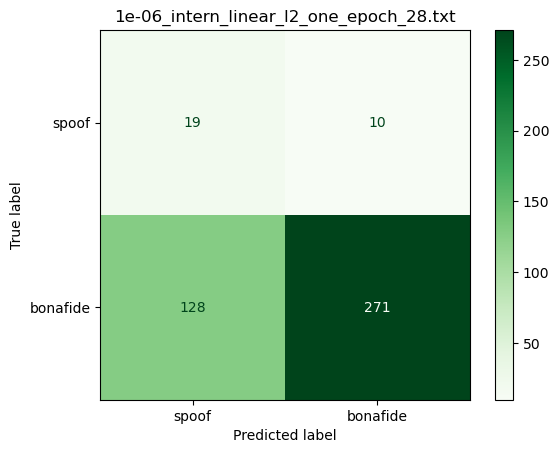

In [14]:
pred_df = pd.read_csv("docs/1e-06_intern_linear_l2_one_epoch_28.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(intern, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_intern_linear_l2_one_epoch_28.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

EER: 48.4275%, threshold: 3.7796


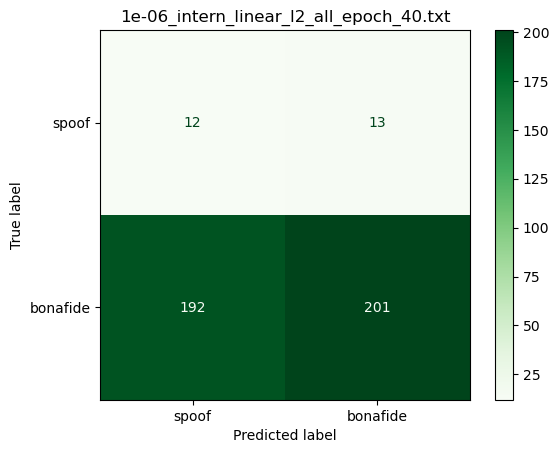

In [15]:
pred_df = pd.read_csv("docs/1e-06_intern_linear_l2_all_epoch_40.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]

pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
pred_df.head
# merge eval_df and pred_df on utt
res_df = pd.merge(intern, pred_df, on='utt')
# print(res_df.head)
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')


# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("1e-06_intern_linear_l2_all_epoch_40.txt")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()